# 중간에 test, train dataset (validation 말고) 나누는 것은 엑셀을 건들였음. 구글링 하기 귀찮아서 그냥 엑셀 건듦 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential

# feature engineering

열병합 한 상태로 진행

In [2]:
from os.path import join
df = pd.read_excel('rain_data.xlsx')
df.head()

홍수사상번호     연  월   일  시간         유입량  데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1  2006  7  10   8  189.100000      6.4           7           7   
1       1  2006  7  10   9  216.951962      6.3           7           8   
2       1  2006  7  10  10  251.424419      6.4           7           9   
3       1  2006  7  10  11  302.812199      7.3           7          10   
4       1  2006  7  10  12  384.783406      8.2           7          12   

   Unnamed: 9  ...  Unnamed: 38  Unnamed: 39  Unnamed: 40  데이터 집단 6  \
0           7  ...            8         2.54      122.660       6.4   
1           7  ...           10         2.53      122.648       7.3   
2           7  ...           11         2.53      122.636       8.2   
3           7  ...           14         2.53      122.620      11.3   
4           8  ...           16         2.53      122.604      14.4   

   Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  \
0            7            7            8            8         2.54   
1            7            8           10           10         2.53   
2            7            9           10           11         2.53   
3            9           10           15           14         2.53   
4           12           12           18           16         2.53   

   Unnamed: 47  
0      122.610  
1      122.600  
2      122.590  
3      122.585  
4      122.575  

[5 rows x 48 columns]

# 연,월,일,시간 을 datetime format 으로 변경

## 시간 의 경우, datetime 에서 24 를 인식하지 못한다. 비슷한 맥락이므로 -1 을 진행하여 붙힌다

In [3]:
df['시간'] = df['시간']-1
df.head()

홍수사상번호     연  월   일  시간         유입량  데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1  2006  7  10   7  189.100000      6.4           7           7   
1       1  2006  7  10   8  216.951962      6.3           7           8   
2       1  2006  7  10   9  251.424419      6.4           7           9   
3       1  2006  7  10  10  302.812199      7.3           7          10   
4       1  2006  7  10  11  384.783406      8.2           7          12   

   Unnamed: 9  ...  Unnamed: 38  Unnamed: 39  Unnamed: 40  데이터 집단 6  \
0           7  ...            8         2.54      122.660       6.4   
1           7  ...           10         2.53      122.648       7.3   
2           7  ...           11         2.53      122.636       8.2   
3           7  ...           14         2.53      122.620      11.3   
4           8  ...           16         2.53      122.604      14.4   

   Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  \
0            7            7            8            8         2.54   
1            7            8           10           10         2.53   
2            7            9           10           11         2.53   
3            9           10           15           14         2.53   
4           12           12           18           16         2.53   

   Unnamed: 47  
0      122.610  
1      122.600  
2      122.590  
3      122.585  
4      122.575  

[5 rows x 48 columns]

## 연 월 일 시간 을 datetime 으로 한번에 붙힌다. 

### dateInt 잘 들어갔는지 확인

In [4]:
df['dateInt']= df['연'].astype(str) + df['월'].astype(str).str.zfill(2)+df['일'].astype(str).str.zfill(2)+df['시간'].astype(str).str.zfill(2)
df['dateInt']

0       2006071007
1       2006071008
2       2006071009
3       2006071010
4       2006071011
           ...    
3046    2018070716
3047    2018070717
3048    2018070718
3049    2018070719
3050    2018070720
Name: dateInt, Length: 3051, dtype: object

### dateInt 를 datetime format 으로 변경하여 Date 라는 칼럼에 저장

In [5]:
df['Date'] = pd.to_datetime(df['dateInt'], format="%Y%m%d%H")
df['Date']

0      2006-07-10 07:00:00
1      2006-07-10 08:00:00
2      2006-07-10 09:00:00
3      2006-07-10 10:00:00
4      2006-07-10 11:00:00
               ...        
3046   2018-07-07 16:00:00
3047   2018-07-07 17:00:00
3048   2018-07-07 18:00:00
3049   2018-07-07 19:00:00
3050   2018-07-07 20:00:00
Name: Date, Length: 3051, dtype: datetime64[ns]

### Date 칼럼이 제일 뒤로 갔으므로 앞으로 당겨서 사용할 것임. insert 사용

In [6]:
df.insert(4, 'date', value = df['Date'])
df.head()

홍수사상번호     연  월   일                date  시간         유입량  데이터집단 1  \
0       1  2006  7  10 2006-07-10 07:00:00   7  189.100000      6.4   
1       1  2006  7  10 2006-07-10 08:00:00   8  216.951962      6.3   
2       1  2006  7  10 2006-07-10 09:00:00   9  251.424419      6.4   
3       1  2006  7  10 2006-07-10 10:00:00  10  302.812199      7.3   
4       1  2006  7  10 2006-07-10 11:00:00  11  384.783406      8.2   

   Unnamed: 7  Unnamed: 8  ...  Unnamed: 40  데이터 집단 6  Unnamed: 42  \
0           7           7  ...      122.660       6.4            7   
1           7           8  ...      122.648       7.3            7   
2           7           9  ...      122.636       8.2            7   
3           7          10  ...      122.620      11.3            9   
4           7          12  ...      122.604      14.4           12   

   Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0            7            8            8         2.54      122.610   
1            8           10           10         2.53      122.600   
2            9           10           11         2.53      122.590   
3           10           15           14         2.53      122.585   
4           12           18           16         2.53      122.575   

      dateInt                Date  
0  2006071007 2006-07-10 07:00:00  
1  2006071008 2006-07-10 08:00:00  
2  2006071009 2006-07-10 09:00:00  
3  2006071010 2006-07-10 10:00:00  
4  2006071011 2006-07-10 11:00:00  

[5 rows x 51 columns]

### date 라는 칼럼 하나만 사용할 예정이기에, 연,월,일,시간,dateInt, Date 를 drop

In [7]:
df =df.drop(['연','월','일','시간','dateInt','Date'], axis = 1)
df.head()

홍수사상번호                date         유입량  데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1 2006-07-10 07:00:00  189.100000      6.4           7           7   
1       1 2006-07-10 08:00:00  216.951962      6.3           7           8   
2       1 2006-07-10 09:00:00  251.424419      6.4           7           9   
3       1 2006-07-10 10:00:00  302.812199      7.3           7          10   
4       1 2006-07-10 11:00:00  384.783406      8.2           7          12   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 38  \
0           7            8         2.54    122.56875  ...            8   
1           7            8         2.53    122.56250  ...           10   
2           7            8         2.53    122.55625  ...           11   
3           7            8         2.53    122.55625  ...           14   
4           8           10         2.53    122.55625  ...           16   

   Unnamed: 39  Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
0         2.54      122.660       6.4            7            7            8   
1         2.53      122.648       7.3            7            8           10   
2         2.53      122.636       8.2            7            9           10   
3         2.53      122.620      11.3            9           10           15   
4         2.53      122.604      14.4           12           12           18   

   Unnamed: 45  Unnamed: 46  Unnamed: 47  
0            8         2.54      122.610  
1           10         2.53      122.600  
2           11         2.53      122.590  
3           14         2.53      122.585  
4           16         2.53      122.575  

[5 rows x 45 columns]

# date, 홍수 사상번호 두개 다 index 로 사용해야될 것 같다고 생각. 나중에 시도해 볼것

### date 를 index 로 사용  
#### 해 봤는데, date 로 진행하게 되면 얘가 그래프를 그릴때도, 비어있는 데이터에 대해서 (1,2,3,4,5, 9,10,11,12 월 ) 는 값이 없어서 아예 평균을 내는 현상을 발견함. 
- index 는 date 로 하면 안되는 거 같음. 
- 아... date 데이터 한번 사용해보고 싶었는데... 좀만 더 생각을 해보자. 

In [8]:
# df = df.set_index('date')
# df.head()

# 데이터 집단 1-6 안에 있는 a-e 데이터를 아예 평균을 내서 새로운 feature 로 저장

In [9]:
# df['avg_A_waterfall']  = (df['Unnamed: 7']  + df['Unnamed: 14'] +df['Unnamed: 21'] +df['Unnamed: 28'] +df['Unnamed: 35'] +df['Unnamed: 42'])/6
# df['avg_B_waterfall']  = (df['Unnamed: 8']  + df['Unnamed: 15'] +df['Unnamed: 22'] +df['Unnamed: 29'] +df['Unnamed: 36'] +df['Unnamed: 43'])/6
# df['avg_C_waterfall']  = (df['Unnamed: 9']  + df['Unnamed: 16'] +df['Unnamed: 23'] +df['Unnamed: 30'] +df['Unnamed: 37'] +df['Unnamed: 44'])/6
# df['avg_D_waterfall']  = (df['Unnamed: 10'] + df['Unnamed: 17'] +df['Unnamed: 24'] +df['Unnamed: 31'] +df['Unnamed: 38'] +df['Unnamed: 45'])/6
# df['avg_D_waterlevel'] = (df['Unnamed: 11'] + df['Unnamed: 18'] +df['Unnamed: 25'] +df['Unnamed: 32'] +df['Unnamed: 39'] +df['Unnamed: 46'])/6
# df['avg_E_waterlevel'] = (df['Unnamed: 12'] + df['Unnamed: 19'] +df['Unnamed: 26'] +df['Unnamed: 33'] +df['Unnamed: 40'] +df['Unnamed: 47'])/6
# df['avg_datagroup'] = (df['데이터집단 1'] + df['데이터집단 2'] +df['데이터집단 3'] +df['데이터 집단 4'] +df['데이터 집단 5'] +df['데이터 집단 6'])/6
df.head()

홍수사상번호                date         유입량  데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1 2006-07-10 07:00:00  189.100000      6.4           7           7   
1       1 2006-07-10 08:00:00  216.951962      6.3           7           8   
2       1 2006-07-10 09:00:00  251.424419      6.4           7           9   
3       1 2006-07-10 10:00:00  302.812199      7.3           7          10   
4       1 2006-07-10 11:00:00  384.783406      8.2           7          12   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 38  \
0           7            8         2.54    122.56875  ...            8   
1           7            8         2.53    122.56250  ...           10   
2           7            8         2.53    122.55625  ...           11   
3           7            8         2.53    122.55625  ...           14   
4           8           10         2.53    122.55625  ...           16   

   Unnamed: 39  Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
0         2.54      122.660       6.4            7            7            8   
1         2.53      122.648       7.3            7            8           10   
2         2.53      122.636       8.2            7            9           10   
3         2.53      122.620      11.3            9           10           15   
4         2.53      122.604      14.4           12           12           18   

   Unnamed: 45  Unnamed: 46  Unnamed: 47  
0            8         2.54      122.610  
1           10         2.53      122.600  
2           11         2.53      122.590  
3           14         2.53      122.585  
4           16         2.53      122.575  

[5 rows x 45 columns]

# 절대값 씌운 것

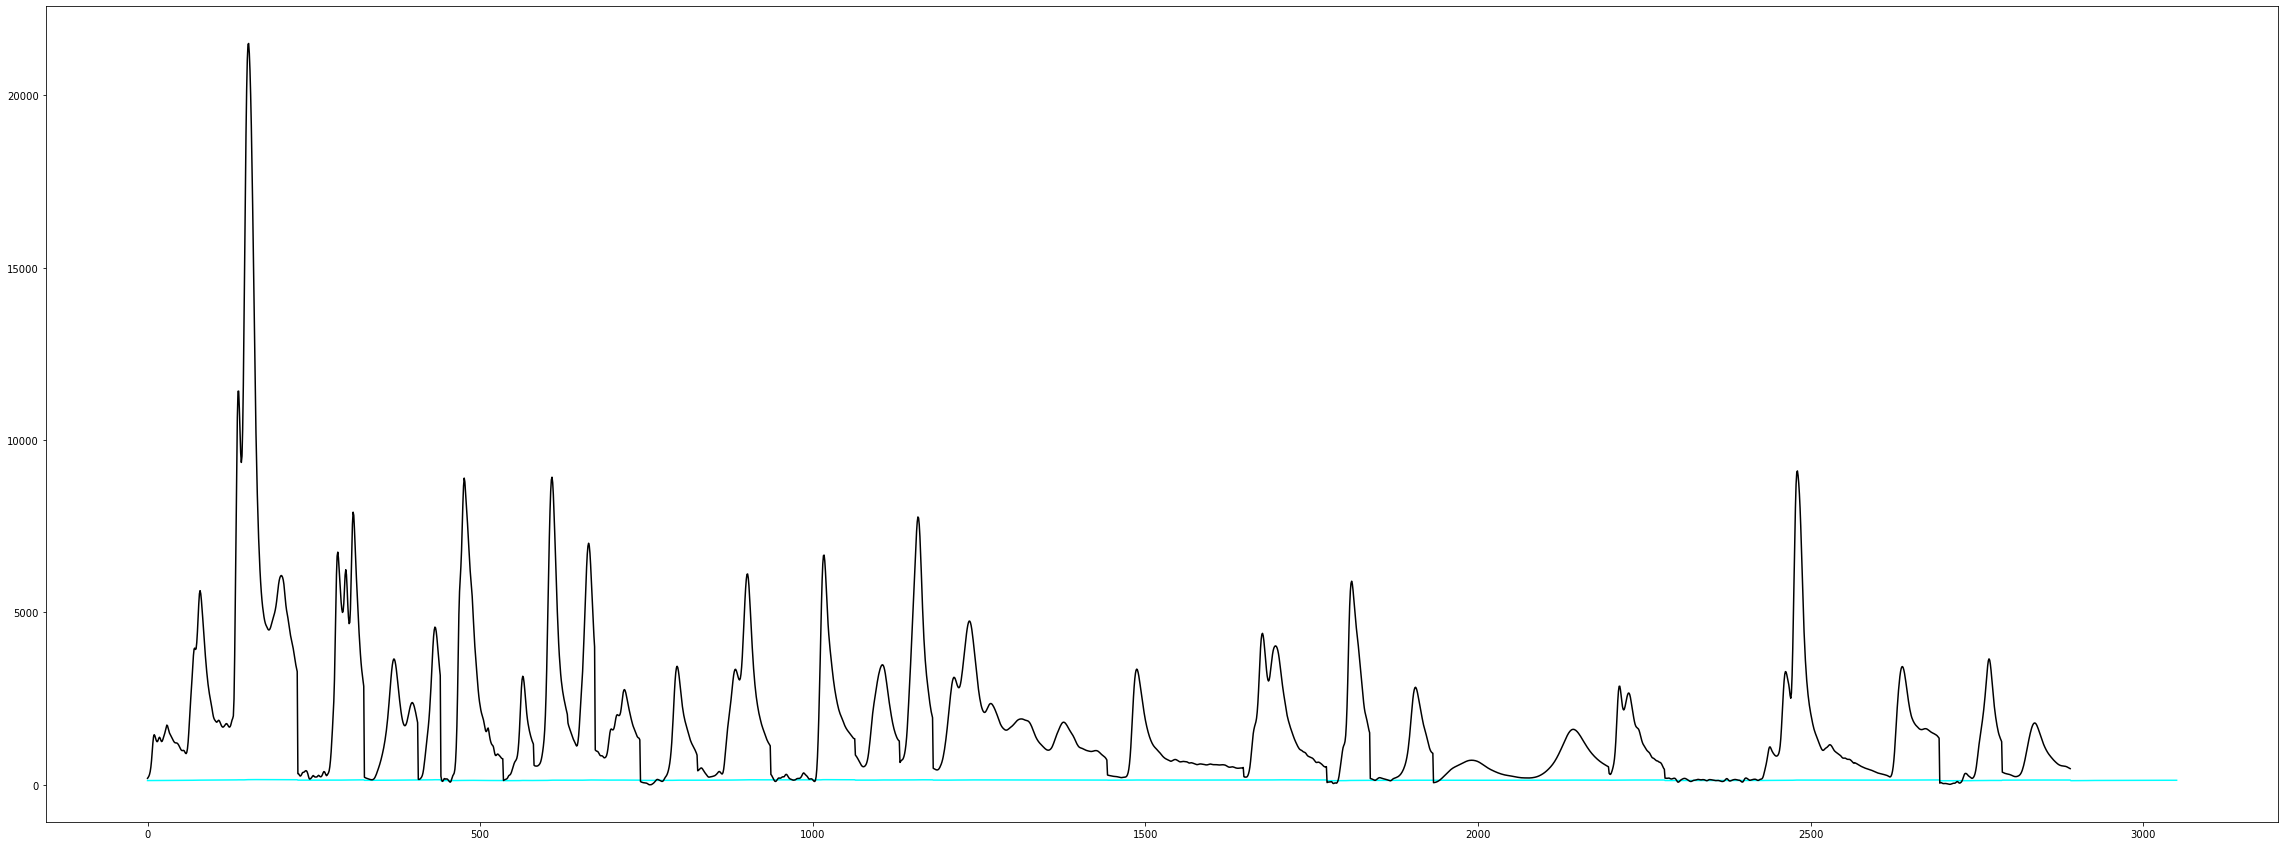

In [10]:
plt.figure(figsize = (40,15))
# df['sub_D_waterlevel-D_drop'] = df['Unnamed: 12']-df['Unnamed: 9']
# df['add_D+E_waterlevel'] =np.absolute(df['Unnamed: 11']+df['Unnamed: 12'])
df['add_D+E_waterlevel'] =df['Unnamed: 11']+df['Unnamed: 12']
plt.plot(df['add_D+E_waterlevel'], color = 'cyan')
# plt.plot(df['sub_D_waterlevel-D_drop'], color = 'red')
plt.plot(df['유입량'], color = 'black')

# Smoothing 

Text(0.5, 1.0, 'ETH rolling window=10')

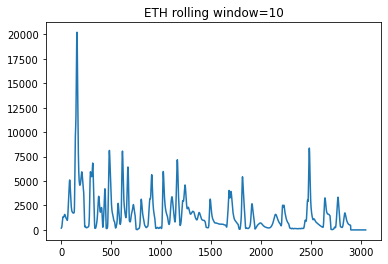

In [11]:
rolling_10 = df['유입량'].rolling(10, min_periods=0).mean()
plt.plot(rolling_10)
plt.title('ETH rolling window=10')

# scaling 진행 할 것-----> feature engineering 좀만 더 하다가 사용해보자. 

In [12]:
# feature_list = ['유입량','데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']

In [13]:
feature_list = ['유입량','데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','add_D+E_waterlevel']

In [14]:
for sth in feature_list:
    norm_inflow = (df[sth]-df[sth].min())/(df[sth].max()-df[sth].min())
    df[sth]=norm_inflow
df.head()

홍수사상번호                date       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1 2006-07-10 07:00:00  0.008630  0.019488    0.021277    0.019074   
1       1 2006-07-10 08:00:00  0.009926  0.019184    0.021277    0.021798   
2       1 2006-07-10 09:00:00  0.011529  0.019488    0.021277    0.024523   
3       1 2006-07-10 10:00:00  0.013919  0.022229    0.021277    0.027248   
4       1 2006-07-10 11:00:00  0.017731  0.024970    0.021277    0.032698   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
0    0.027668     0.030534     0.093930     0.153560  ...     0.093930   
1    0.027668     0.030534     0.093291     0.153312  ...     0.093291   
2    0.027668     0.030534     0.093291     0.153064  ...     0.093291   
3    0.027668     0.030534     0.093291     0.153064  ...     0.093291   
4    0.031621     0.038168     0.093291     0.153064  ...     0.093291   

   Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
0     0.157418  0.020046     0.020290     0.019499     0.032389     0.030651   
1     0.156941  0.022873     0.020290     0.022284     0.040486     0.038314   
2     0.156464  0.025700     0.020290     0.025070     0.040486     0.042146   
3     0.155828  0.035436     0.026087     0.027855     0.060729     0.053640   
4     0.155192  0.045173     0.034783     0.033426     0.072874     0.061303   

   Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
0     0.093930     0.155313            0.157887  
1     0.093291     0.154916            0.157406  
2     0.093291     0.154518            0.157222  
3     0.093291     0.154320            0.157222  
4     0.093291     0.153923            0.157222  

[5 rows x 46 columns]

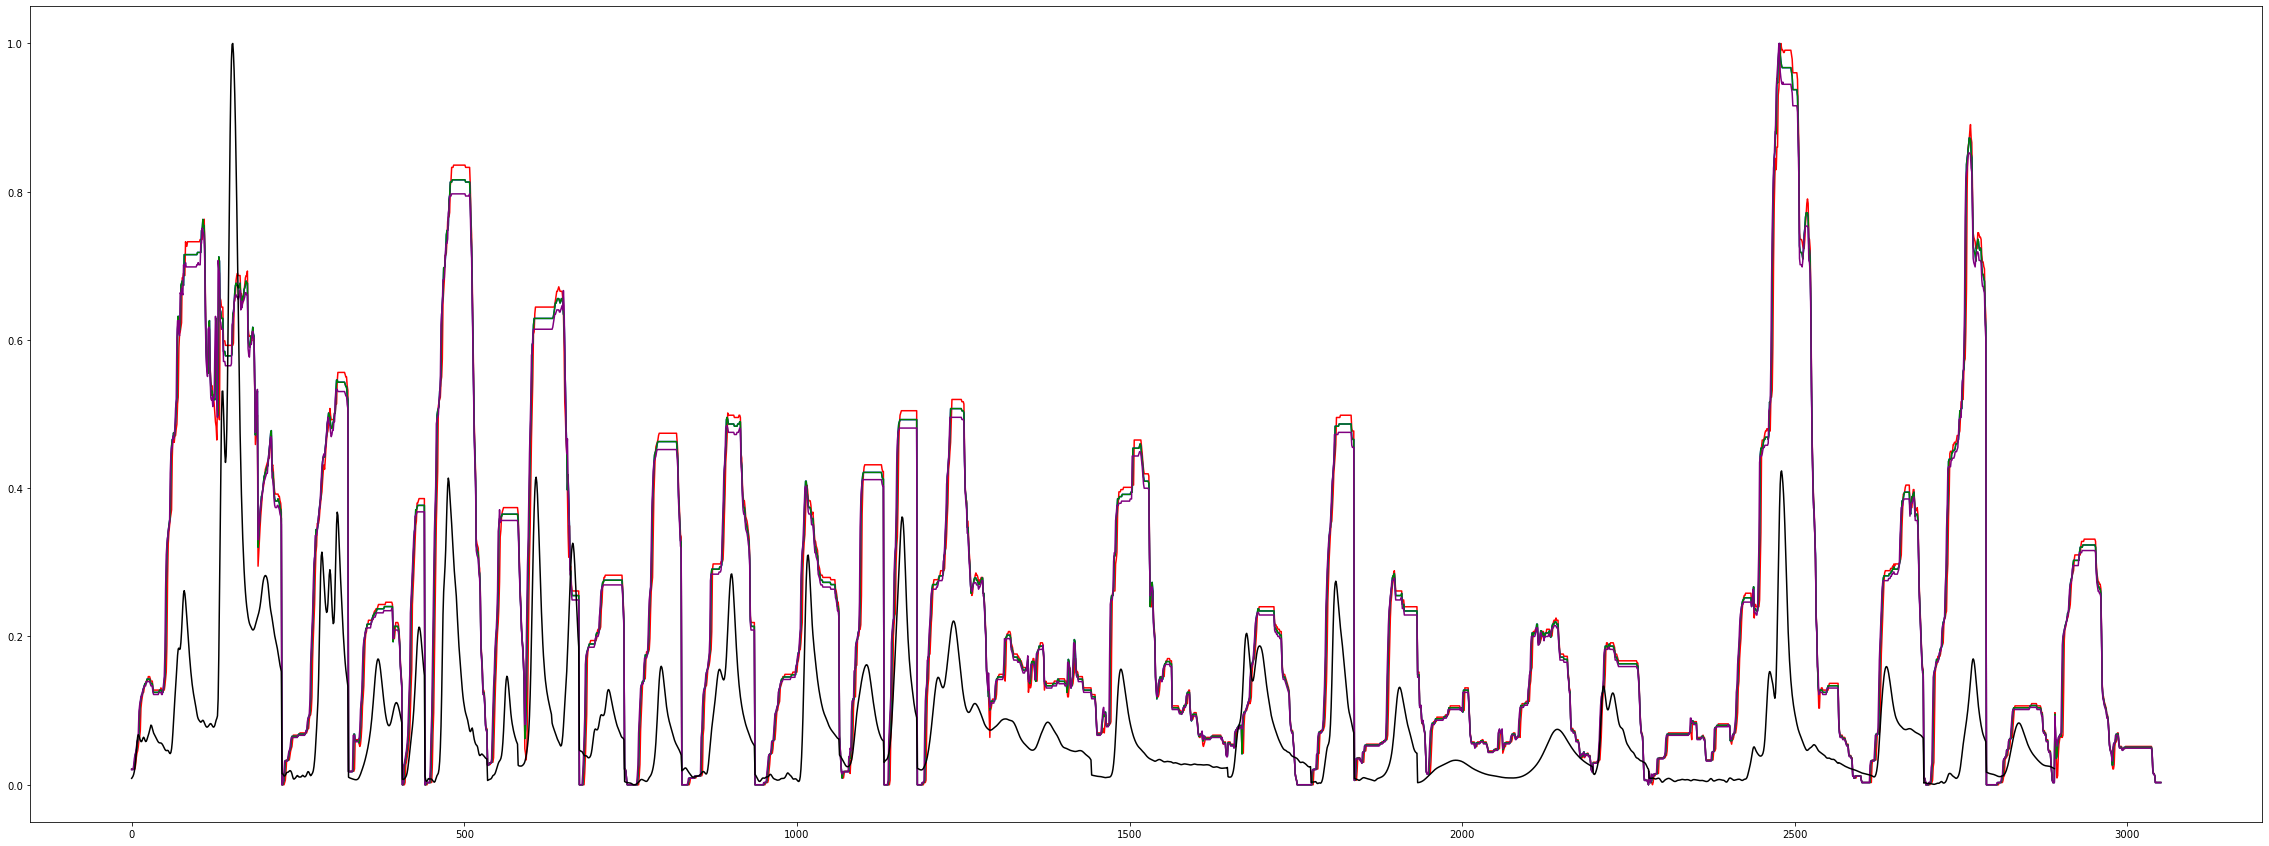

In [15]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 7'], color = 'Red') #강우량
plt.plot(df['Unnamed: 14'], color = 'blue') #강우량
plt.plot(df['Unnamed: 21'], color = 'green') #강우량
plt.plot(df['Unnamed: 28'], color = 'purple') #강우량
plt.plot(df['유입량'], color = 'black') #유입량

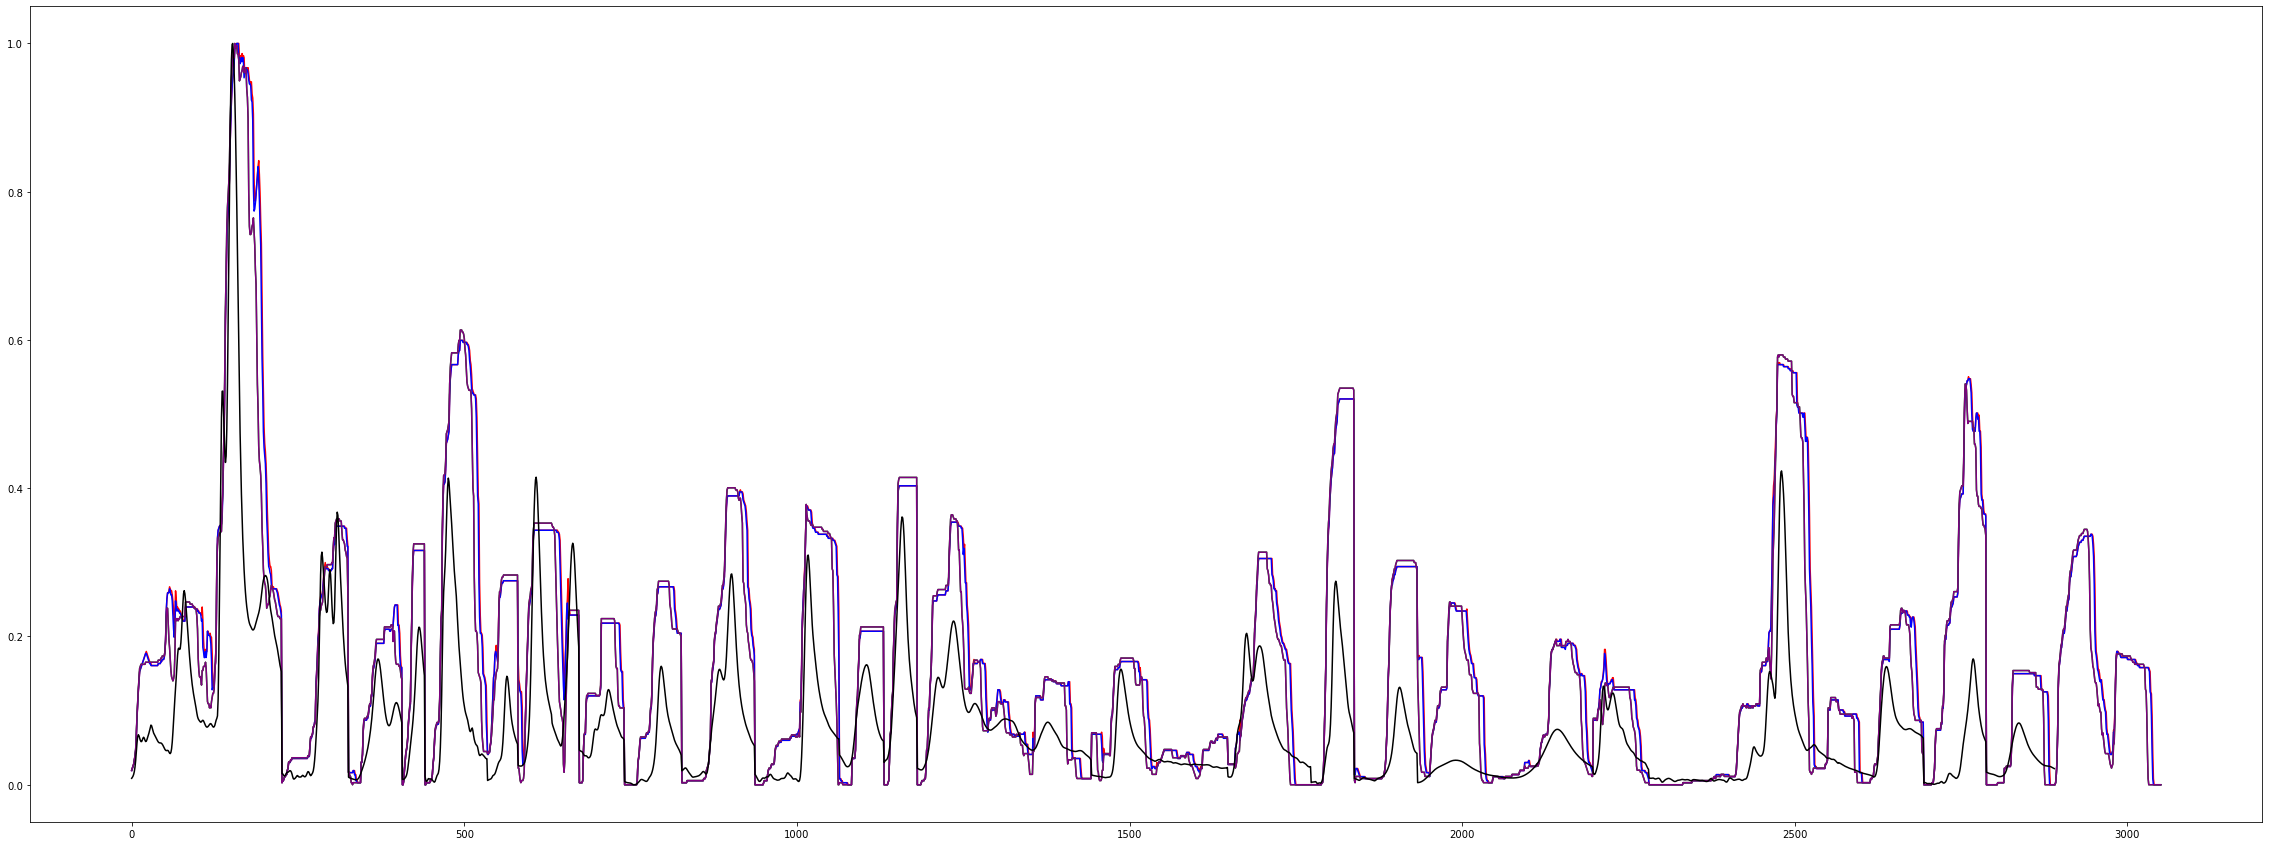

In [16]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 8'], color = 'red') #강우량
plt.plot(df['Unnamed: 15'], color = 'blue') #강우량
plt.plot(df['Unnamed: 22'], color = 'green') #강우량
plt.plot(df['Unnamed: 29'], color = 'purple') #강우량
plt.plot(df['유입량'], color = 'black') #유입량

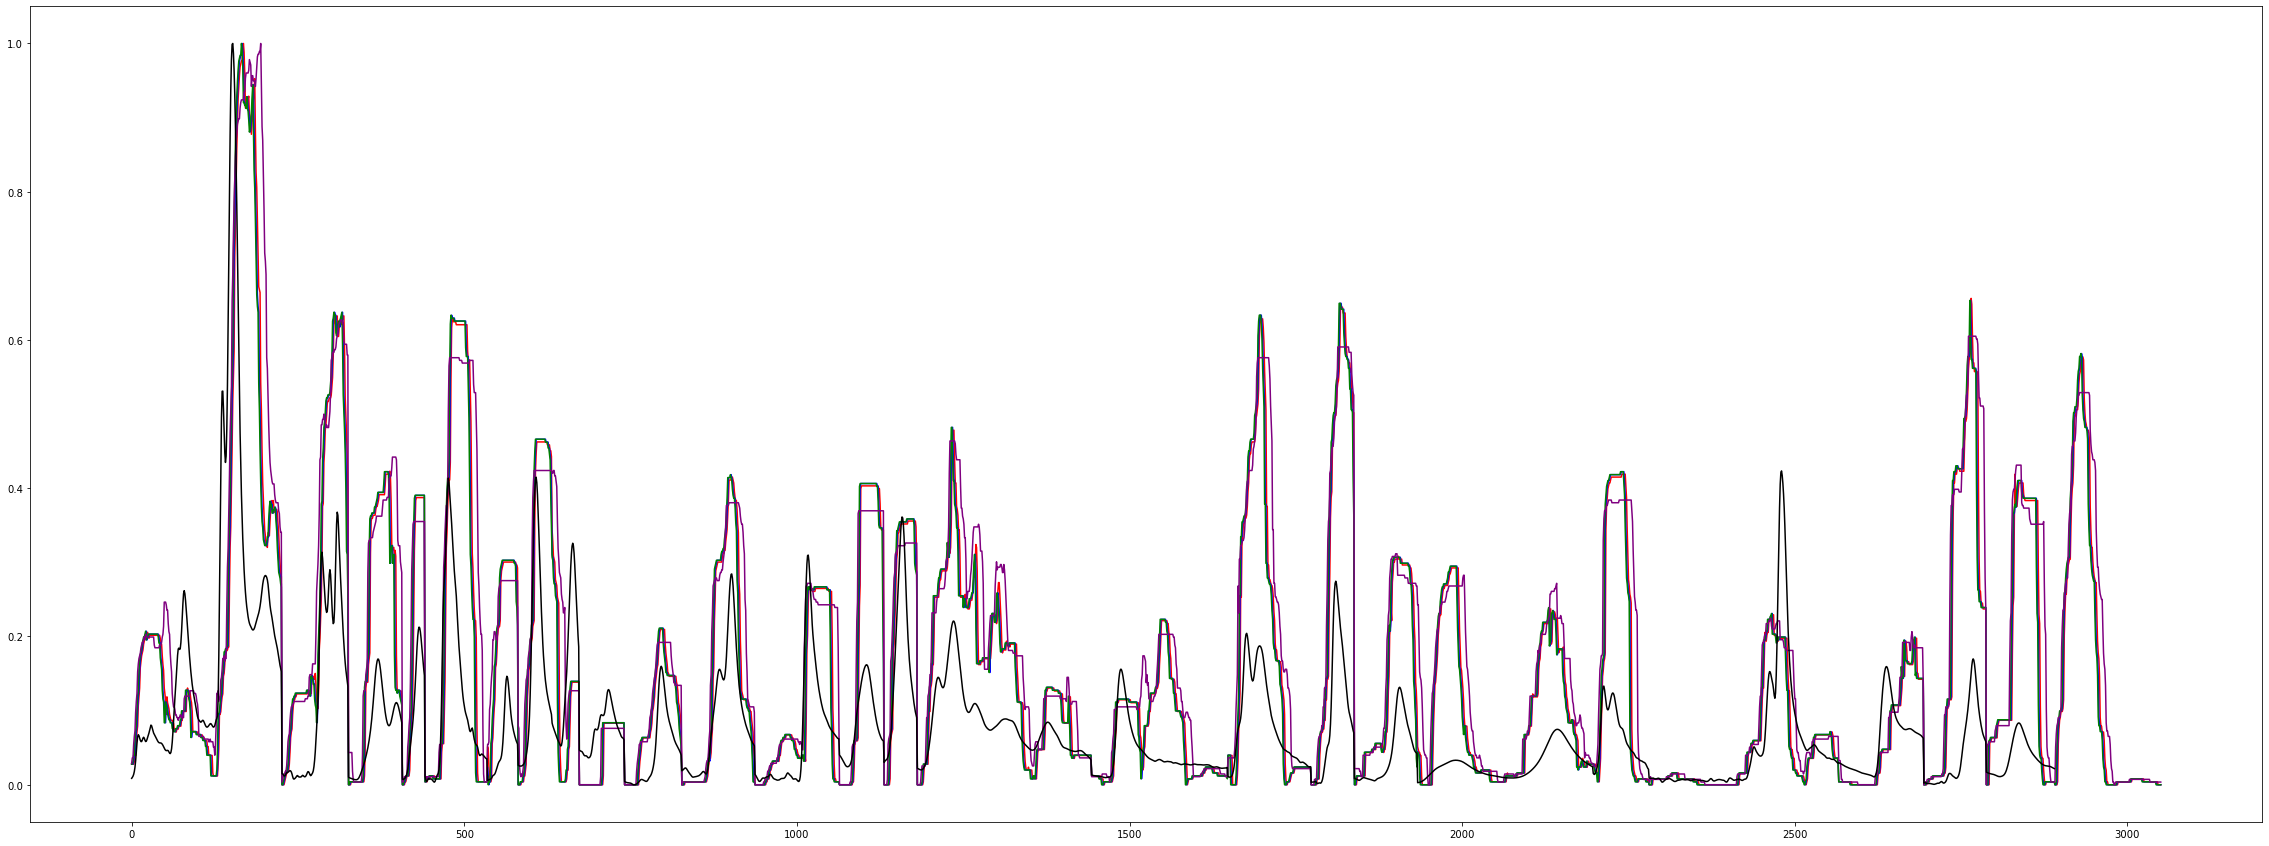

In [17]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 9'], color = 'Red') #강우량
plt.plot(df['Unnamed: 16'], color = 'blue') #강우량
plt.plot(df['Unnamed: 23'], color = 'green') #강우량
plt.plot(df['Unnamed: 30'], color = 'purple') #강우량
plt.plot(df['유입량'], color = 'black') #유입량

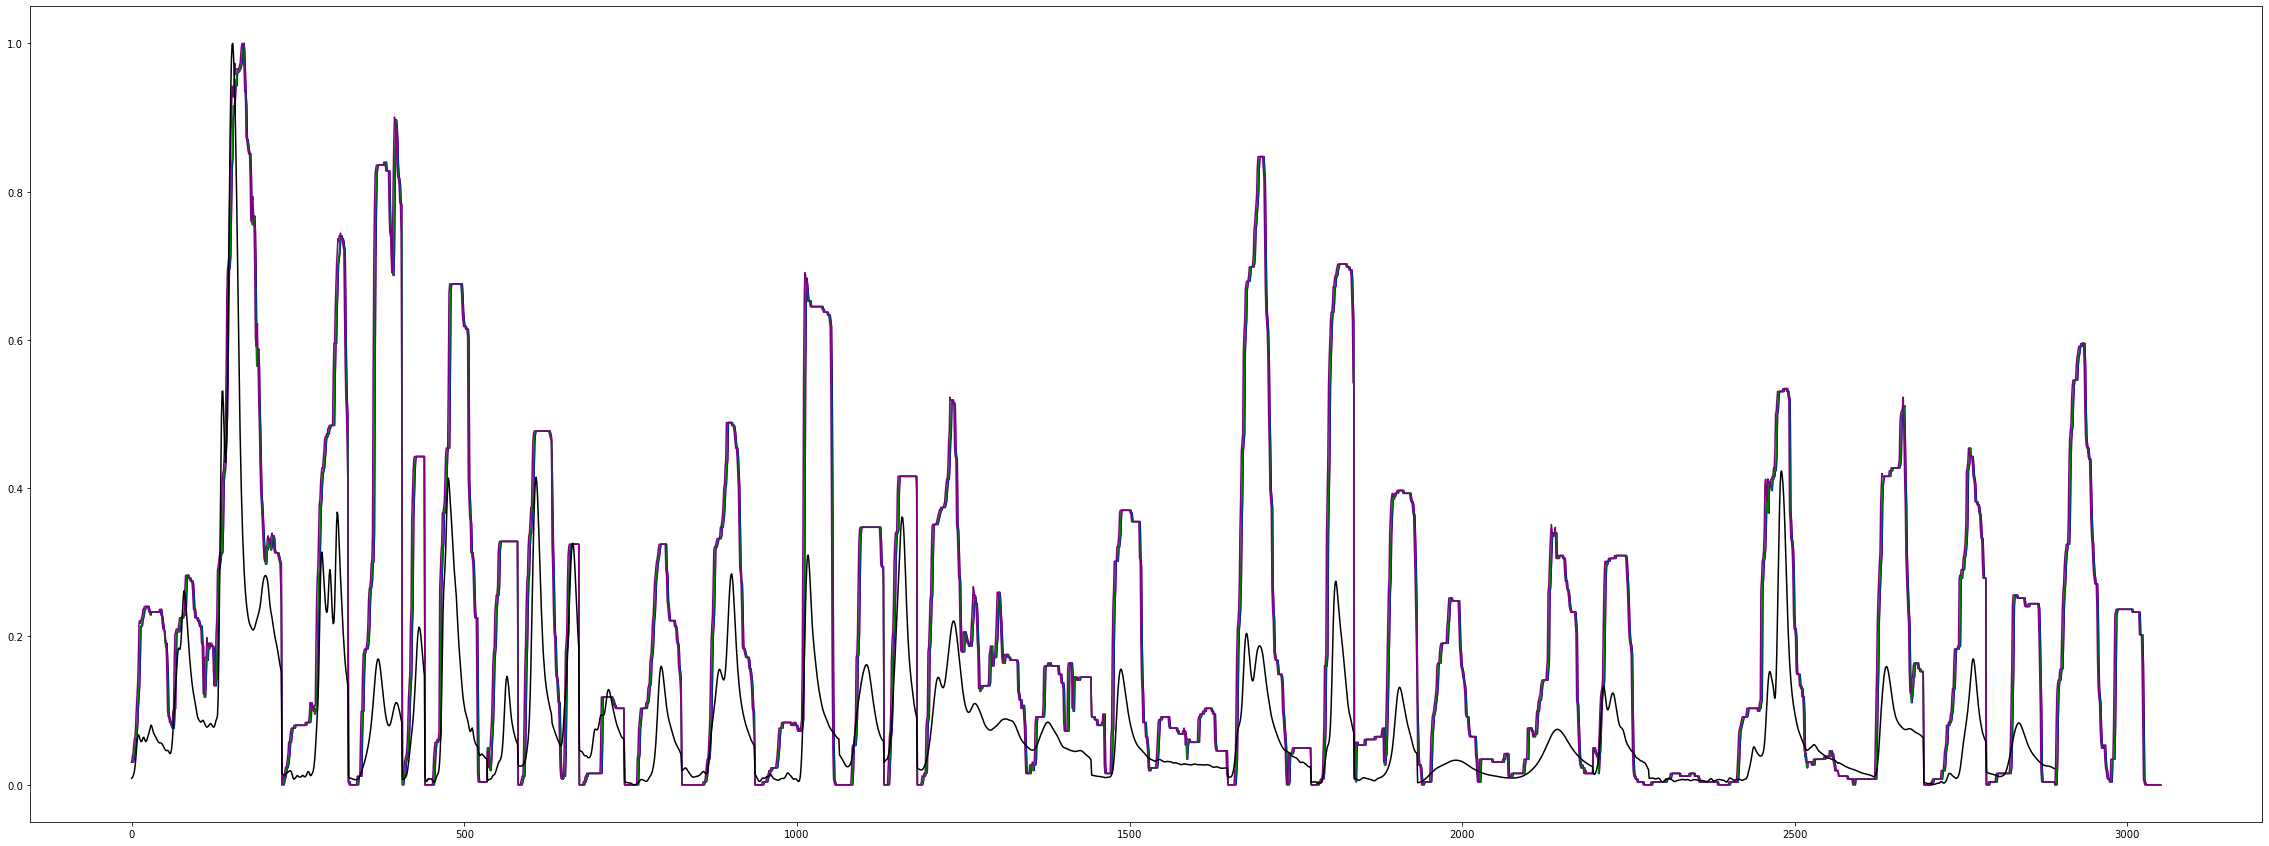

In [18]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 10'], color = 'Red') #강우량
plt.plot(df['Unnamed: 17'], color = 'blue') #강우량
plt.plot(df['Unnamed: 24'], color = 'green') #강우량
plt.plot(df['Unnamed: 31'], color = 'purple') #강우량
plt.plot(df['유입량'], color = 'black') #유입량

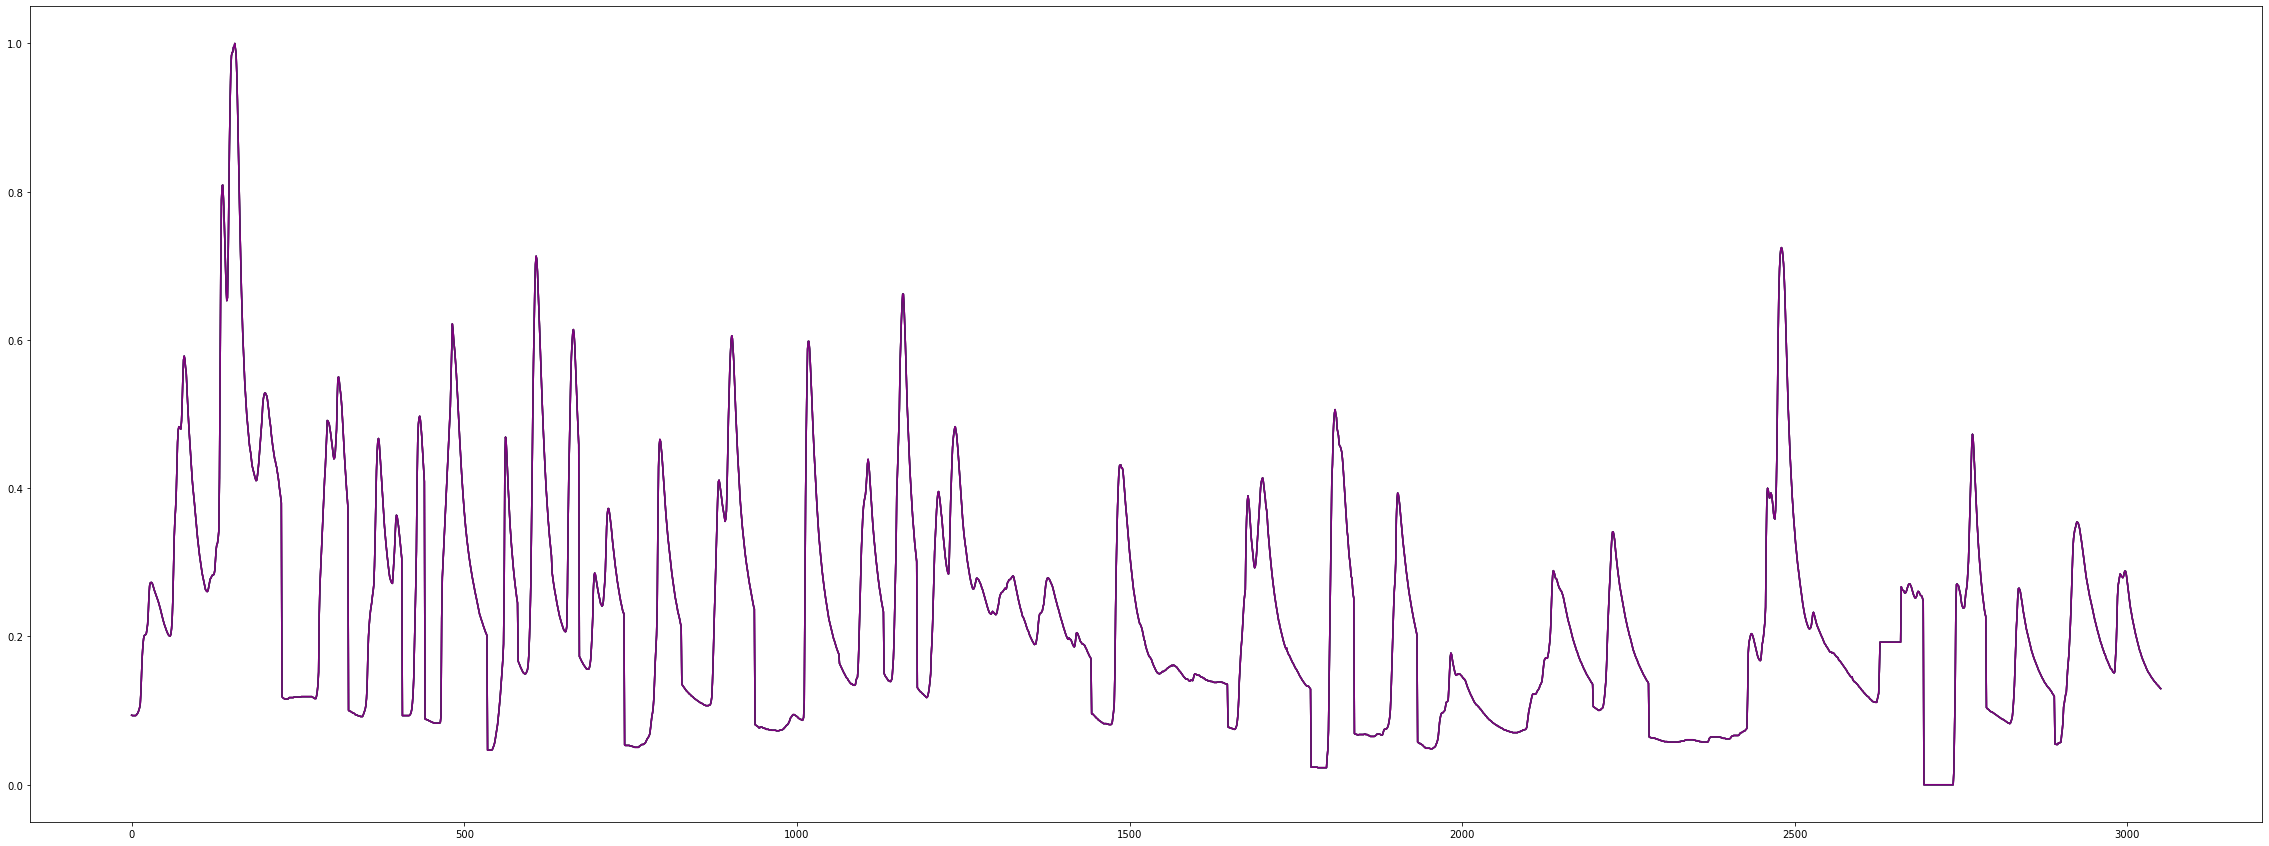

In [19]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 11'], color = 'Red') #강우량
plt.plot(df['Unnamed: 18'], color = 'blue') #강우량
plt.plot(df['Unnamed: 25'], color = 'green') #강우량
plt.plot(df['Unnamed: 32'], color = 'purple') #강우량
# plt.plot(df['유입량'], color = 'black') #유입량

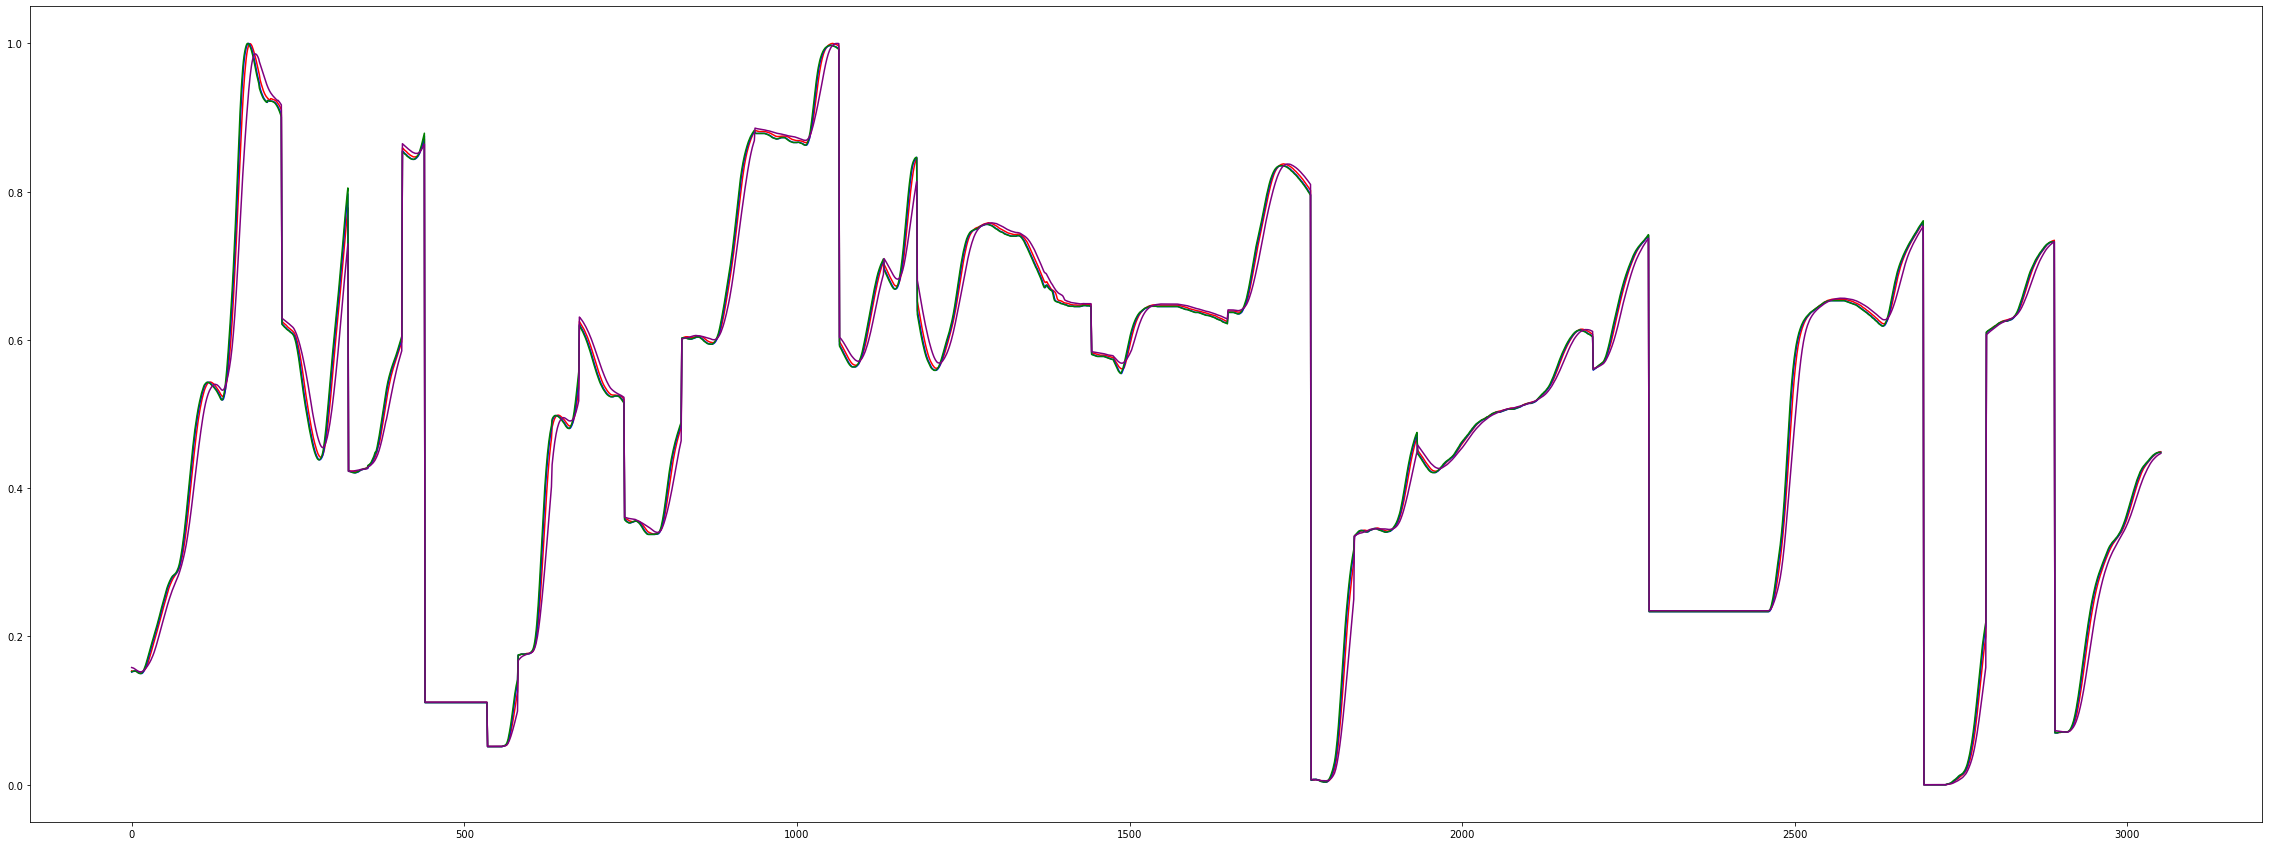

In [20]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 12'], color = 'Red') #수위
plt.plot(df['Unnamed: 19'], color = 'blue') #수위
plt.plot(df['Unnamed: 26'], color = 'green') #수위
plt.plot(df['Unnamed: 33'], color = 'purple') #수위
# plt.plot(df['유입량'], color = 'red') #유입량

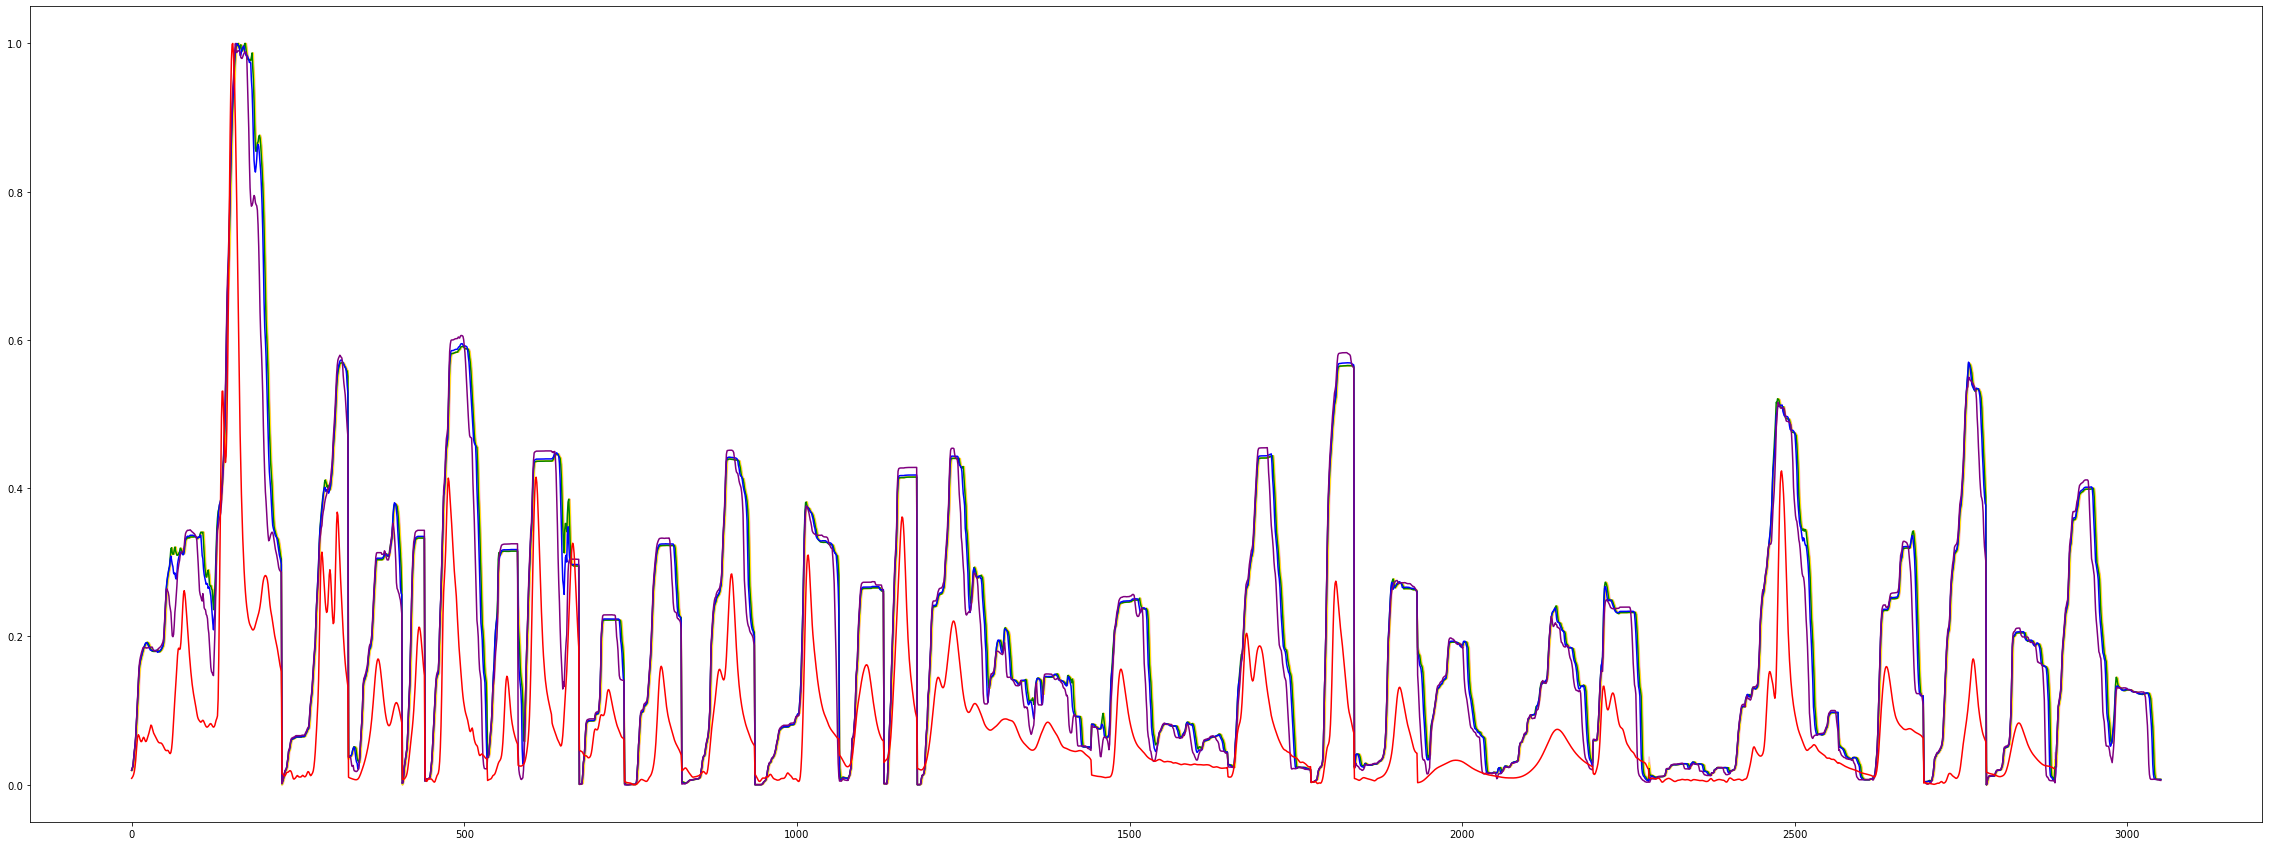

In [21]:
plt.figure(figsize = (40,15))
plt.plot(df['데이터집단 1'], color = 'pink') #수위
plt.plot(df['데이터집단 2'], color = 'orange') #수위
plt.plot(df['데이터집단 3'], color = 'yellow') #수위
plt.plot(df['데이터 집단 4'], color = 'green') #수위
plt.plot(df['데이터 집단 5'], color = 'blue') #수위
plt.plot(df['데이터 집단 6'], color = 'purple') #수위
plt.plot(df['유입량'], color = 'red') #유입량

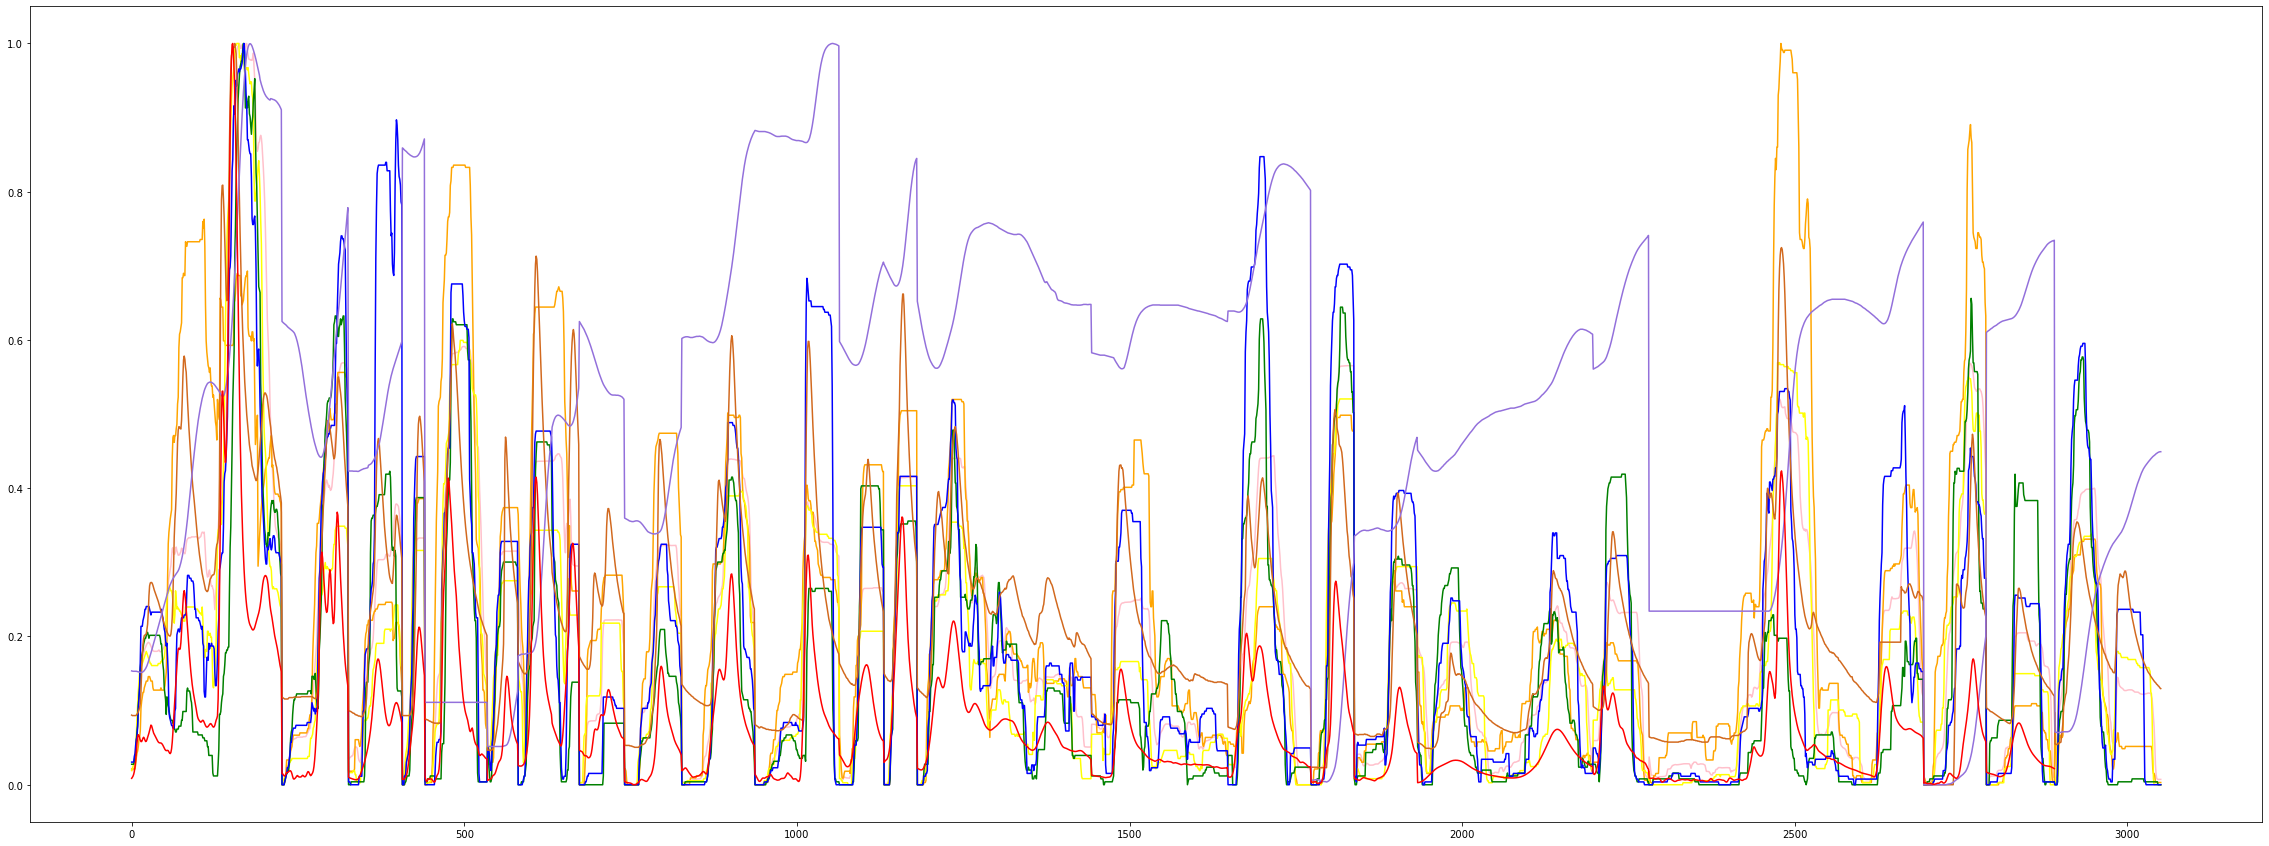

In [22]:
plt.figure(figsize = (40,15))
plt.plot(df['데이터집단 1'], color = 'pink') #유역별평균 강수량
plt.plot(df['Unnamed: 7'], color = 'orange') #A수위
plt.plot(df['Unnamed: 8'], color = 'yellow') #B수위
plt.plot(df['Unnamed: 9'], color = 'green') #C수위
plt.plot(df['Unnamed: 10'], color = 'blue') #D수위
plt.plot(df['Unnamed: 11'], color = 'chocolate') #E수위
plt.plot(df['Unnamed: 12'], color = 'mediumpurple') #D수위
plt.plot(df['유입량'], color = 'red') #수위

## 600 지점에 강우량은 적은데 유입량이 많은 것을 발견

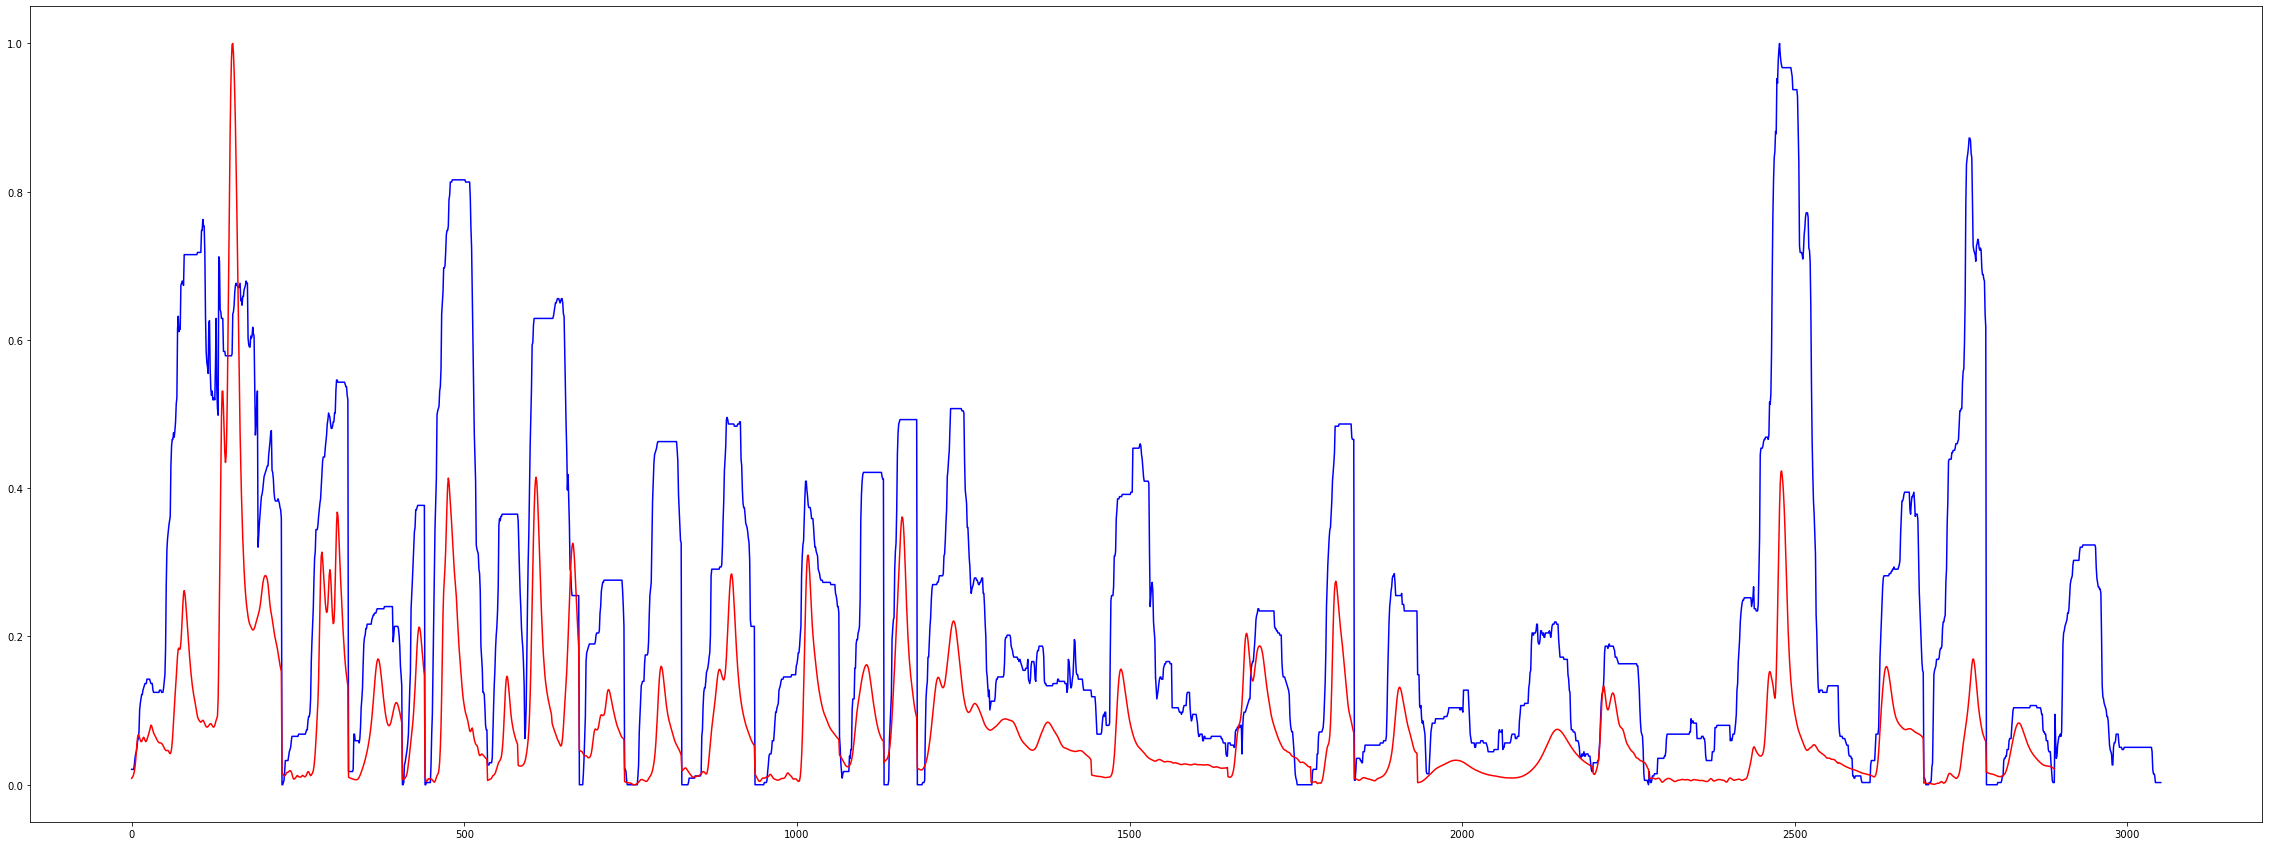

In [23]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 14'], label = '강우량', color = 'blue') #강우량
plt.plot(df['유입량'], label = '유입량', color = 'red') #유입량


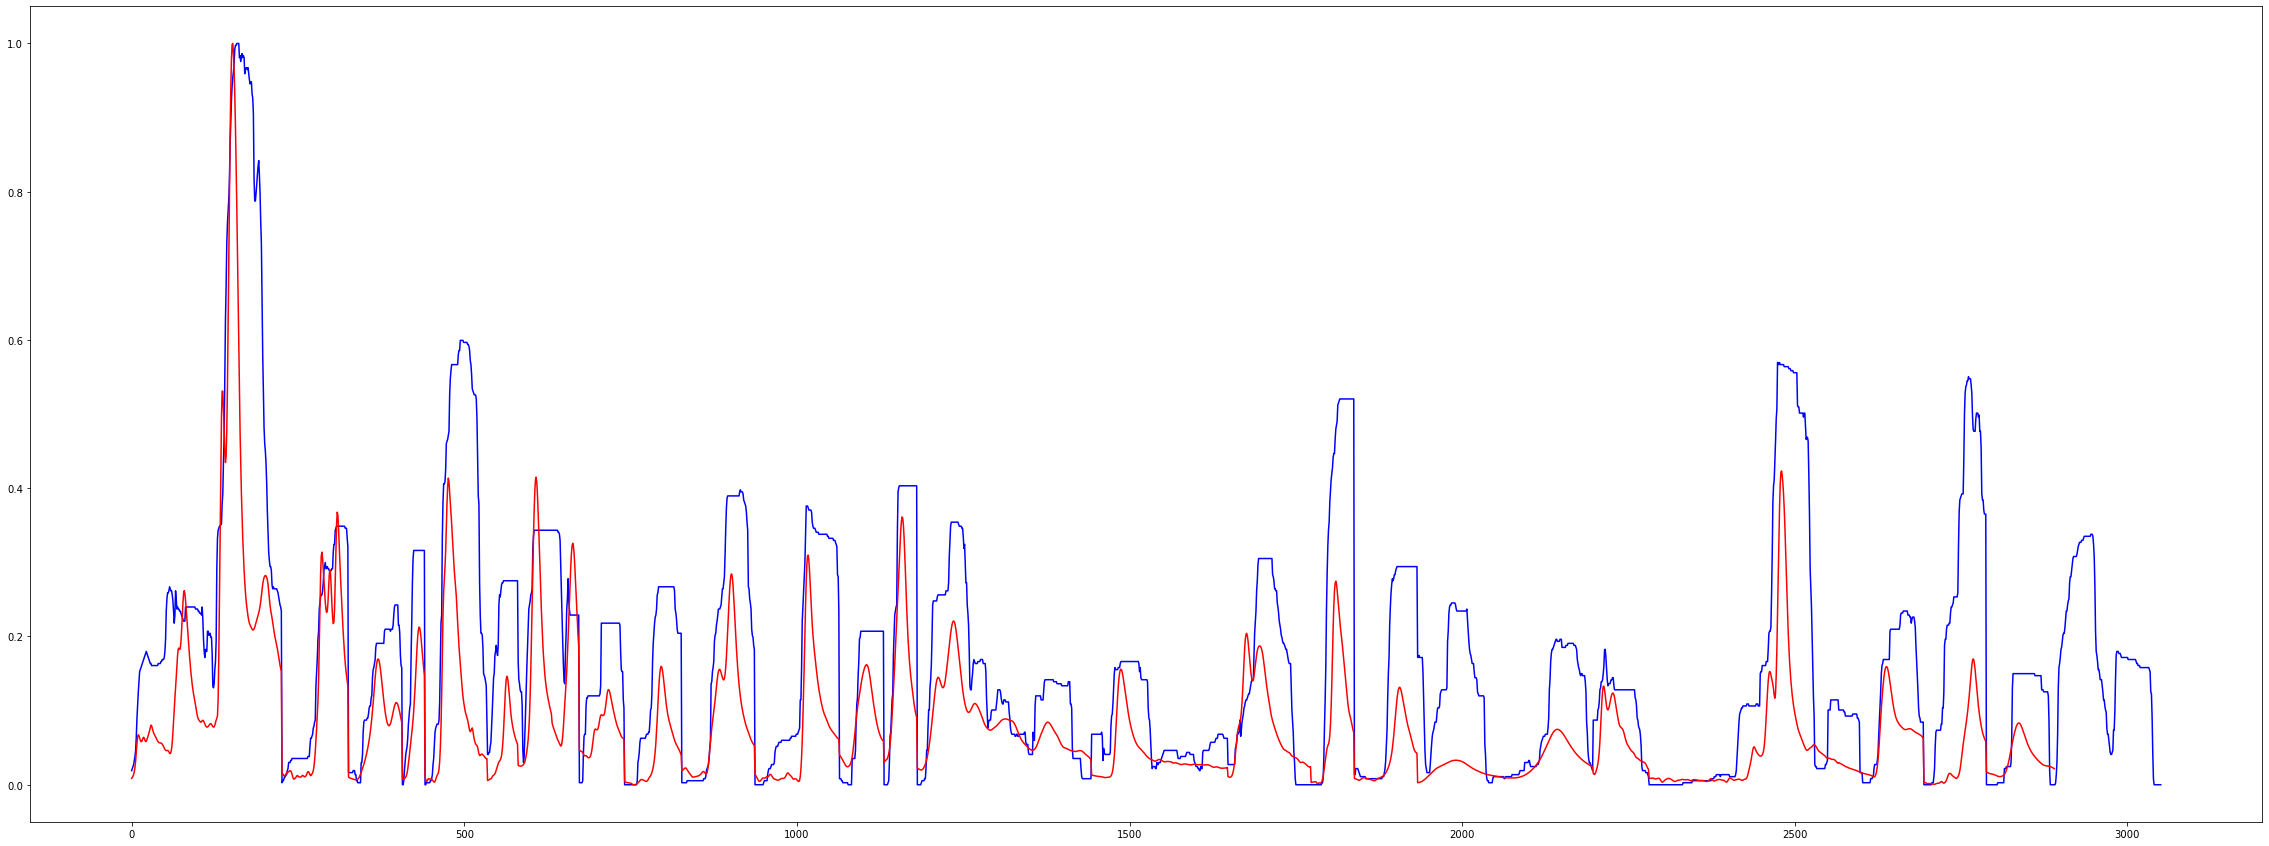

In [24]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 8'], label = '강우량', color = 'blue') #강우량
plt.plot(df['유입량'], label = '유입량', color = 'red') #유입량

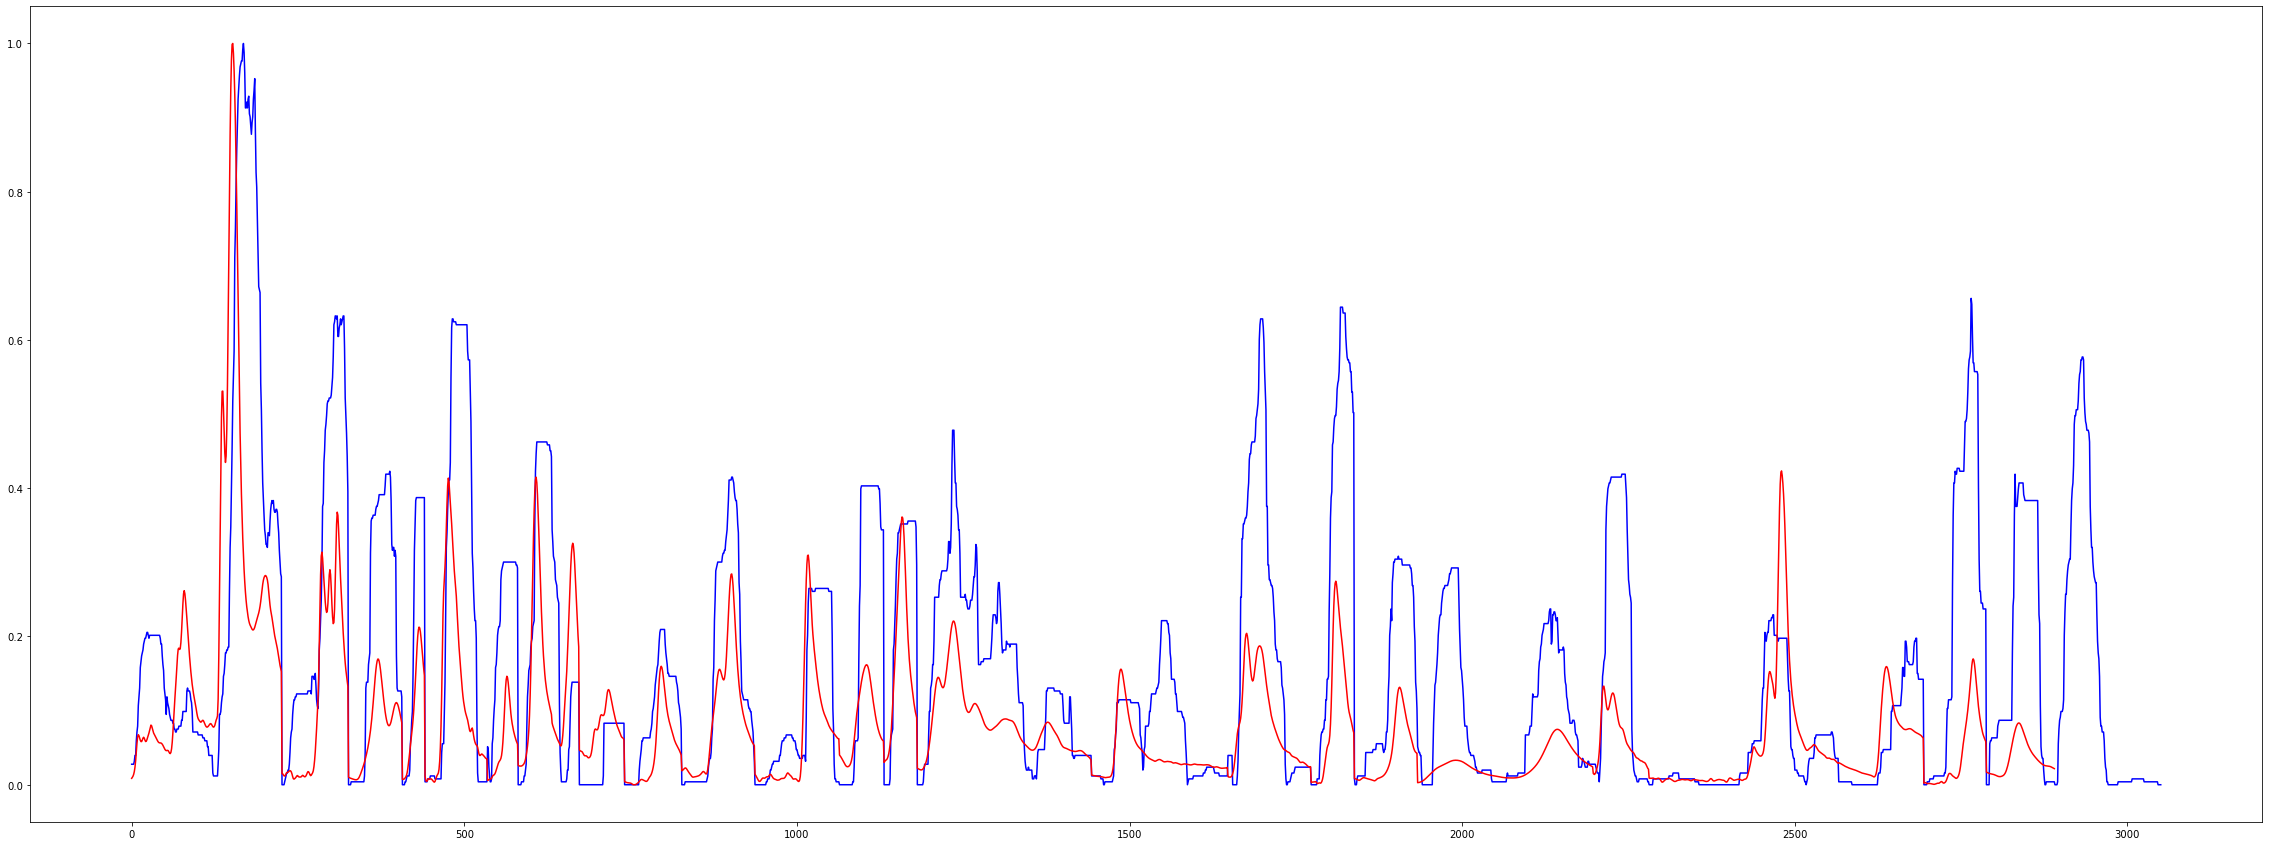

In [25]:
plt.figure(figsize = (40,15))

plt.plot(df['Unnamed: 9'], label = '강우량', color = 'blue') #강우량
plt.plot(df['유입량'], label = '유입량', color = 'red') #유입량

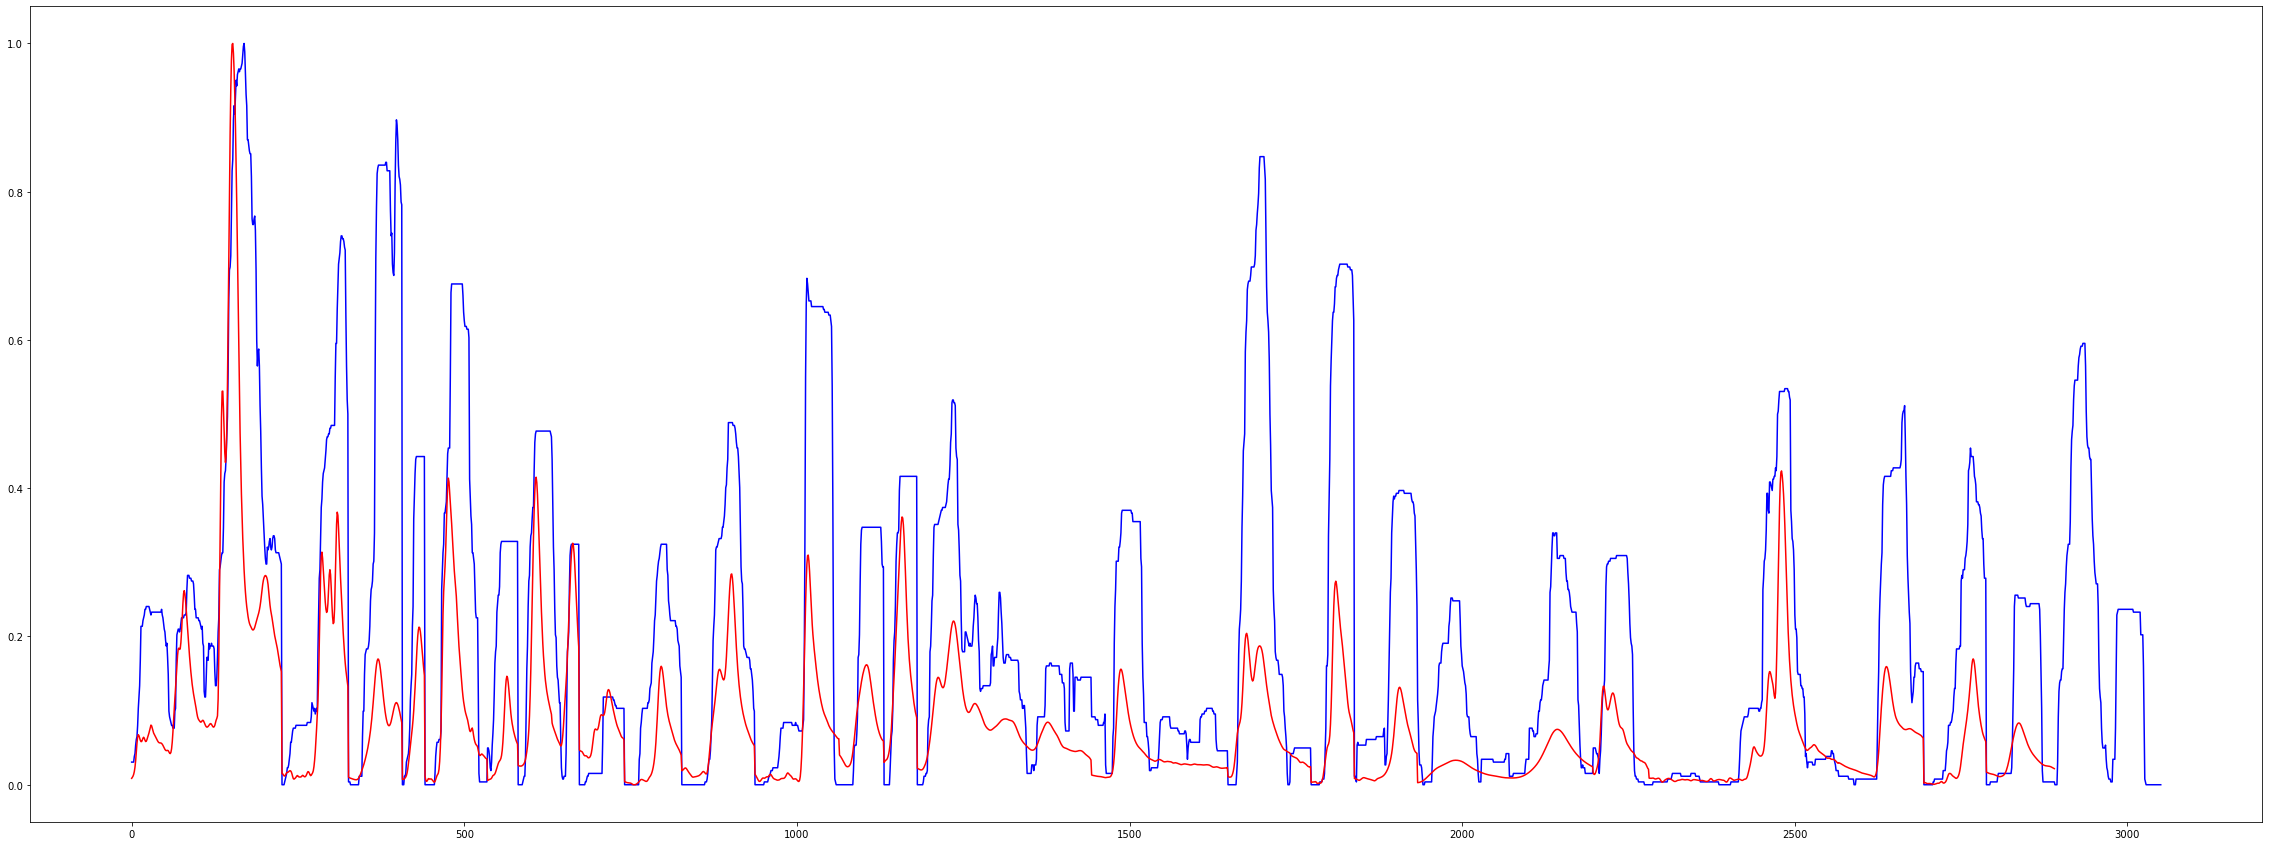

In [26]:
plt.figure(figsize = (40,15))
plt.plot(df['Unnamed: 10'], label = '강우량', color = 'blue') #강우량
plt.plot(df['유입량'], label = '유입량', color = 'red') #유입량

In [27]:
# plt.plot(df['avg_E_waterlevel'])

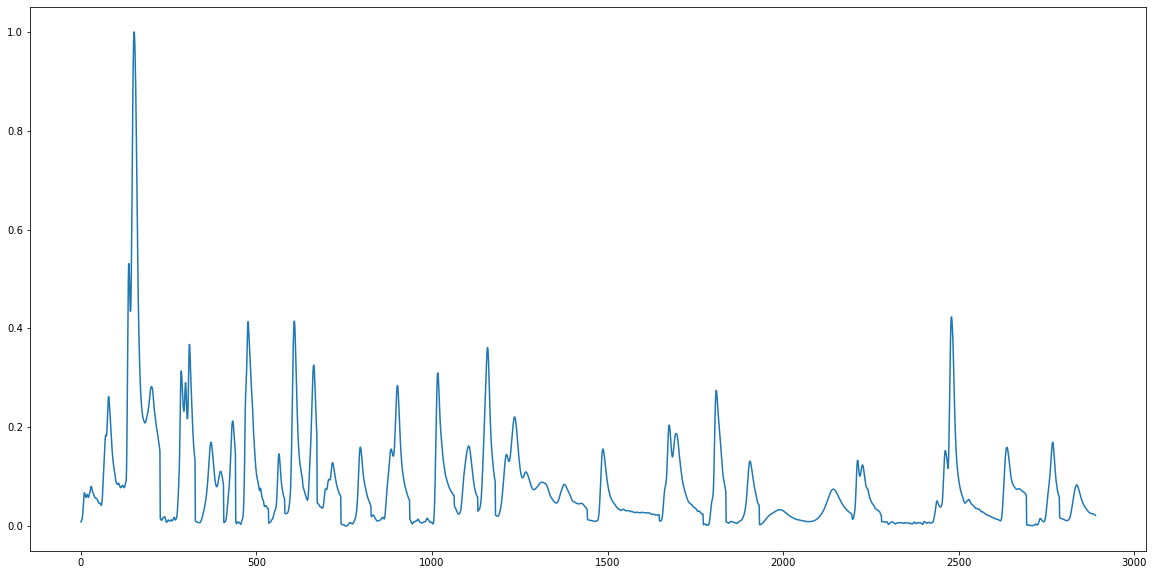

In [28]:
plt.figure(figsize = (20,10))
plt.plot(df['유입량'])

# 만들어 놓은 데이터를 새로운 엑셀 파일로 저장

In [29]:
df.to_excel(excel_writer='0825_datetime_rain_data.xlsx')
print(df.shape)
df.head()

(3051, 46)


홍수사상번호                date       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
0       1 2006-07-10 07:00:00  0.008630  0.019488    0.021277    0.019074   
1       1 2006-07-10 08:00:00  0.009926  0.019184    0.021277    0.021798   
2       1 2006-07-10 09:00:00  0.011529  0.019488    0.021277    0.024523   
3       1 2006-07-10 10:00:00  0.013919  0.022229    0.021277    0.027248   
4       1 2006-07-10 11:00:00  0.017731  0.024970    0.021277    0.032698   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
0    0.027668     0.030534     0.093930     0.153560  ...     0.093930   
1    0.027668     0.030534     0.093291     0.153312  ...     0.093291   
2    0.027668     0.030534     0.093291     0.153064  ...     0.093291   
3    0.027668     0.030534     0.093291     0.153064  ...     0.093291   
4    0.031621     0.038168     0.093291     0.153064  ...     0.093291   

   Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
0     0.157418  0.020046     0.020290     0.019499     0.032389     0.030651   
1     0.156941  0.022873     0.020290     0.022284     0.040486     0.038314   
2     0.156464  0.025700     0.020290     0.025070     0.040486     0.042146   
3     0.155828  0.035436     0.026087     0.027855     0.060729     0.053640   
4     0.155192  0.045173     0.034783     0.033426     0.072874     0.061303   

   Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
0     0.093930     0.155313            0.157887  
1     0.093291     0.154916            0.157406  
2     0.093291     0.154518            0.157222  
3     0.093291     0.154320            0.157222  
4     0.093291     0.153923            0.157222  

[5 rows x 46 columns]

# index 설정을 안해서 그런가... 이상하게 값이 저장된다... 맨 앞에 있는 0123456789 가 계속해서 생성된다 저장을 할때마다. 

일단은 저장을 할때 첫 row 는 삭제 하는 식으로 진행하자. 

# train, test dataset 서로 다른 엑셀 파일에 저장하는 것 성공

## 아니 근데 왜 저장을 할때 마다 새로운 인덱스 column 이 생성되는지 모르겠다. 

### train dataset 에는 1~25 까지의 데이터가 존재 하고 
### test dataset 에는 26 만 데이터가 존재 하는 상황이다. 

# train data 안에 있을 index는 0-2890 총 2891 개 

In [30]:
df_train = df
df_train = df_train.iloc[:2891]
df_train

홍수사상번호                date       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
0          1 2006-07-10 07:00:00  0.008630  0.019488    0.021277    0.019074   
1          1 2006-07-10 08:00:00  0.009926  0.019184    0.021277    0.021798   
2          1 2006-07-10 09:00:00  0.011529  0.019488    0.021277    0.024523   
3          1 2006-07-10 10:00:00  0.013919  0.022229    0.021277    0.027248   
4          1 2006-07-10 11:00:00  0.017731  0.024970    0.021277    0.032698   
...      ...                 ...       ...       ...         ...         ...   
2886      25 2017-07-18 17:00:00  0.023712  0.069378    0.018237    0.000000   
2887      25 2017-07-18 18:00:00  0.023223  0.025148    0.006079    0.000000   
2888      25 2017-07-18 19:00:00  0.022716  0.012512    0.003040    0.000000   
2889      25 2017-07-18 20:00:00  0.022211  0.010309    0.003040    0.000000   
2890      25 2017-07-18 21:00:00  0.021716  0.010000    0.003040    0.000000   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
0       0.027668     0.030534     0.093930     0.153560  ...     0.093930   
1       0.027668     0.030534     0.093291     0.153312  ...     0.093291   
2       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
3       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
4       0.031621     0.038168     0.093291     0.153064  ...     0.093291   
...          ...          ...          ...          ...  ...          ...   
2886    0.003953     0.003817     0.125240     0.733069  ...     0.125240   
2887    0.003953     0.003817     0.123323     0.733565  ...     0.123323   
2888    0.003953     0.003817     0.122045     0.733813  ...     0.122045   
2889    0.003953     0.003817     0.120767     0.734061  ...     0.120767   
2890    0.003953     0.003817     0.119489     0.734557  ...     0.119489   

      Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
0        0.157418  0.020046     0.020290     0.019499     0.032389   
1        0.156941  0.022873     0.020290     0.022284     0.040486   
2        0.156464  0.025700     0.020290     0.025070     0.040486   
3        0.155828  0.035436     0.026087     0.027855     0.060729   
4        0.155192  0.045173     0.034783     0.033426     0.072874   
...           ...       ...          ...          ...          ...   
2886     0.730959  0.005399     0.017391     0.000000     0.004049   
2887     0.731595  0.005399     0.005797     0.000000     0.004049   
2888     0.732231  0.005399     0.002899     0.000000     0.004049   
2889     0.732867  0.005399     0.002899     0.000000     0.004049   
2890     0.733503  0.005399     0.002899     0.000000     0.004049   

      Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
0        0.030651     0.093930     0.155313            0.157887  
1        0.038314     0.093291     0.154916            0.157406  
2        0.042146     0.093291     0.154518            0.157222  
3        0.053640     0.093291     0.154320            0.157222  
4        0.061303     0.093291     0.153923            0.157222  
...           ...          ...          ...                 ...  
2886     0.003831     0.125240     0.732075            0.604155  
2887     0.003831     0.123323     0.732671            0.603638  
2888     0.003831     0.122045     0.733069            0.603231  
2889     0.003831     0.120767     0.733466            0.602824  
2890     0.003831     0.119489     0.734062            0.602602  

[2891 rows x 46 columns]

# train_dataset 저장하기

In [31]:
df_train.to_excel(excel_writer='0825_train.xlsx')
df_train

홍수사상번호                date       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
0          1 2006-07-10 07:00:00  0.008630  0.019488    0.021277    0.019074   
1          1 2006-07-10 08:00:00  0.009926  0.019184    0.021277    0.021798   
2          1 2006-07-10 09:00:00  0.011529  0.019488    0.021277    0.024523   
3          1 2006-07-10 10:00:00  0.013919  0.022229    0.021277    0.027248   
4          1 2006-07-10 11:00:00  0.017731  0.024970    0.021277    0.032698   
...      ...                 ...       ...       ...         ...         ...   
2886      25 2017-07-18 17:00:00  0.023712  0.069378    0.018237    0.000000   
2887      25 2017-07-18 18:00:00  0.023223  0.025148    0.006079    0.000000   
2888      25 2017-07-18 19:00:00  0.022716  0.012512    0.003040    0.000000   
2889      25 2017-07-18 20:00:00  0.022211  0.010309    0.003040    0.000000   
2890      25 2017-07-18 21:00:00  0.021716  0.010000    0.003040    0.000000   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
0       0.027668     0.030534     0.093930     0.153560  ...     0.093930   
1       0.027668     0.030534     0.093291     0.153312  ...     0.093291   
2       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
3       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
4       0.031621     0.038168     0.093291     0.153064  ...     0.093291   
...          ...          ...          ...          ...  ...          ...   
2886    0.003953     0.003817     0.125240     0.733069  ...     0.125240   
2887    0.003953     0.003817     0.123323     0.733565  ...     0.123323   
2888    0.003953     0.003817     0.122045     0.733813  ...     0.122045   
2889    0.003953     0.003817     0.120767     0.734061  ...     0.120767   
2890    0.003953     0.003817     0.119489     0.734557  ...     0.119489   

      Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
0        0.157418  0.020046     0.020290     0.019499     0.032389   
1        0.156941  0.022873     0.020290     0.022284     0.040486   
2        0.156464  0.025700     0.020290     0.025070     0.040486   
3        0.155828  0.035436     0.026087     0.027855     0.060729   
4        0.155192  0.045173     0.034783     0.033426     0.072874   
...           ...       ...          ...          ...          ...   
2886     0.730959  0.005399     0.017391     0.000000     0.004049   
2887     0.731595  0.005399     0.005797     0.000000     0.004049   
2888     0.732231  0.005399     0.002899     0.000000     0.004049   
2889     0.732867  0.005399     0.002899     0.000000     0.004049   
2890     0.733503  0.005399     0.002899     0.000000     0.004049   

      Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
0        0.030651     0.093930     0.155313            0.157887  
1        0.038314     0.093291     0.154916            0.157406  
2        0.042146     0.093291     0.154518            0.157222  
3        0.053640     0.093291     0.154320            0.157222  
4        0.061303     0.093291     0.153923            0.157222  
...           ...          ...          ...                 ...  
2886     0.003831     0.125240     0.732075            0.604155  
2887     0.003831     0.123323     0.732671            0.603638  
2888     0.003831     0.122045     0.733069            0.603231  
2889     0.003831     0.120767     0.733466            0.602824  
2890     0.003831     0.119489     0.734062            0.602602  

[2891 rows x 46 columns]

# test dataset 만들고 저장하기

In [32]:
df_test = df
df_test = df_test.iloc[2891:]
df_test.head()

홍수사상번호                date  유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
2891      26 2018-07-01 05:00:00  NaN  0.043415    0.097264    0.000000   
2892      26 2018-07-01 06:00:00  NaN  0.033391    0.060790    0.002725   
2893      26 2018-07-01 07:00:00  NaN  0.024191    0.033435    0.013624   
2894      26 2018-07-01 08:00:00  NaN  0.024030    0.009119    0.029973   
2895      26 2018-07-01 09:00:00  NaN  0.040647    0.012158    0.068120   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
2891    0.000000     0.000000     0.054952     0.071198  ...     0.054952   
2892    0.000000     0.000000     0.054952     0.070950  ...     0.054952   
2893    0.000000     0.000000     0.054313     0.070702  ...     0.054313   
2894    0.000000     0.000000     0.054313     0.070454  ...     0.054313   
2895    0.003953     0.030534     0.054313     0.070454  ...     0.054313   

      Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
2891     0.072667  0.002587     0.092754     0.000000     0.004049   
2892     0.072508  0.014912     0.060870     0.002786     0.056680   
2893     0.072349  0.040587     0.060870     0.013928     0.076923   
2894     0.072190  0.061699     0.052174     0.030641     0.089069   
2895     0.072031  0.083558     0.057971     0.069638     0.093117   

      Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
2891     0.000000     0.054952     0.072095            0.078481  
2892     0.030651     0.054952     0.071897            0.078297  
2893     0.091954     0.054313     0.071698            0.077816  
2894     0.126437     0.054313     0.071500            0.077631  
2895     0.137931     0.054313     0.071301            0.077631  

[5 rows x 46 columns]

In [33]:
df_test.to_excel(excel_writer='0825_test.xlsx')
df_test.head()

홍수사상번호                date  유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
2891      26 2018-07-01 05:00:00  NaN  0.043415    0.097264    0.000000   
2892      26 2018-07-01 06:00:00  NaN  0.033391    0.060790    0.002725   
2893      26 2018-07-01 07:00:00  NaN  0.024191    0.033435    0.013624   
2894      26 2018-07-01 08:00:00  NaN  0.024030    0.009119    0.029973   
2895      26 2018-07-01 09:00:00  NaN  0.040647    0.012158    0.068120   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
2891    0.000000     0.000000     0.054952     0.071198  ...     0.054952   
2892    0.000000     0.000000     0.054952     0.070950  ...     0.054952   
2893    0.000000     0.000000     0.054313     0.070702  ...     0.054313   
2894    0.000000     0.000000     0.054313     0.070454  ...     0.054313   
2895    0.003953     0.030534     0.054313     0.070454  ...     0.054313   

      Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
2891     0.072667  0.002587     0.092754     0.000000     0.004049   
2892     0.072508  0.014912     0.060870     0.002786     0.056680   
2893     0.072349  0.040587     0.060870     0.013928     0.076923   
2894     0.072190  0.061699     0.052174     0.030641     0.089069   
2895     0.072031  0.083558     0.057971     0.069638     0.093117   

      Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
2891     0.000000     0.054952     0.072095            0.078481  
2892     0.030651     0.054952     0.071897            0.078297  
2893     0.091954     0.054313     0.071698            0.077816  
2894     0.126437     0.054313     0.071500            0.077631  
2895     0.137931     0.054313     0.071301            0.077631  

[5 rows x 46 columns]

# 현재 데이터의 총 갯수는 2890 이다. feature 는 51 개

In [34]:
df = pd.read_excel('0819_train.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df

(2891, 46)


홍수사상번호                date       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
0          1 2006-07-10 07:00:00  0.008630  0.019488    0.021277    0.019074   
1          1 2006-07-10 08:00:00  0.009926  0.019184    0.021277    0.021798   
2          1 2006-07-10 09:00:00  0.011529  0.019488    0.021277    0.024523   
3          1 2006-07-10 10:00:00  0.013919  0.022229    0.021277    0.027248   
4          1 2006-07-10 11:00:00  0.017731  0.024970    0.021277    0.032698   
...      ...                 ...       ...       ...         ...         ...   
2886      25 2017-07-18 17:00:00  0.023712  0.069378    0.018237    0.000000   
2887      25 2017-07-18 18:00:00  0.023223  0.025148    0.006079    0.000000   
2888      25 2017-07-18 19:00:00  0.022716  0.012512    0.003040    0.000000   
2889      25 2017-07-18 20:00:00  0.022211  0.010309    0.003040    0.000000   
2890      25 2017-07-18 21:00:00  0.021716  0.010000    0.003040    0.000000   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  ...  Unnamed: 39  \
0       0.027668     0.030534     0.093930     0.153560  ...     0.093930   
1       0.027668     0.030534     0.093291     0.153312  ...     0.093291   
2       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
3       0.027668     0.030534     0.093291     0.153064  ...     0.093291   
4       0.031621     0.038168     0.093291     0.153064  ...     0.093291   
...          ...          ...          ...          ...  ...          ...   
2886    0.003953     0.003817     0.125240     0.733069  ...     0.125240   
2887    0.003953     0.003817     0.123323     0.733565  ...     0.123323   
2888    0.003953     0.003817     0.122045     0.733813  ...     0.122045   
2889    0.003953     0.003817     0.120767     0.734061  ...     0.120767   
2890    0.003953     0.003817     0.119489     0.734557  ...     0.119489   

      Unnamed: 40  데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
0        0.157418  0.020046     0.020290     0.019499     0.032389   
1        0.156941  0.022873     0.020290     0.022284     0.040486   
2        0.156464  0.025700     0.020290     0.025070     0.040486   
3        0.155828  0.035436     0.026087     0.027855     0.060729   
4        0.155192  0.045173     0.034783     0.033426     0.072874   
...           ...       ...          ...          ...          ...   
2886     0.730959  0.005399     0.017391     0.000000     0.004049   
2887     0.731595  0.005399     0.005797     0.000000     0.004049   
2888     0.732231  0.005399     0.002899     0.000000     0.004049   
2889     0.732867  0.005399     0.002899     0.000000     0.004049   
2890     0.733503  0.005399     0.002899     0.000000     0.004049   

      Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
0        0.030651     0.093930     0.155313            0.157887  
1        0.038314     0.093291     0.154916            0.157406  
2        0.042146     0.093291     0.154518            0.157222  
3        0.053640     0.093291     0.154320            0.157222  
4        0.061303     0.093291     0.153923            0.157222  
...           ...          ...          ...                 ...  
2886     0.003831     0.125240     0.732075            0.604155  
2887     0.003831     0.123323     0.732671            0.603638  
2888     0.003831     0.122045     0.733069            0.603231  
2889     0.003831     0.120767     0.733466            0.602824  
2890     0.003831     0.119489     0.734062            0.602602  

[2891 rows x 46 columns]

# date 를 index 로 사용하고자 한다. 근데 홍수 사상번호도 index 로 사용해야 되는게 아닌가? 하는 불안감이 있긴한다.  multiindex 라는 것이 있다고 한다. 나중에 필요하면 해당 키워드로 찾아 볼 것 

## 아니다 date 로 하면 datetime 기준으로 하기 때문에 비어있는 데이터들에 대해서 자동적으로 채워준다. 이렇게 되면 안되기 때문에 index 로 사용하지 않기로 결정


In [35]:
df = df.set_index('date')
df.head()

홍수사상번호       유입량   데이터집단 1  Unnamed: 7  Unnamed: 8  \
date                                                                      
2006-07-10 07:00:00       1  0.008630  0.019488    0.021277    0.019074   
2006-07-10 08:00:00       1  0.009926  0.019184    0.021277    0.021798   
2006-07-10 09:00:00       1  0.011529  0.019488    0.021277    0.024523   
2006-07-10 10:00:00       1  0.013919  0.022229    0.021277    0.027248   
2006-07-10 11:00:00       1  0.017731  0.024970    0.021277    0.032698   

                     Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
date                                                                     
2006-07-10 07:00:00    0.027668     0.030534     0.093930     0.153560   
2006-07-10 08:00:00    0.027668     0.030534     0.093291     0.153312   
2006-07-10 09:00:00    0.027668     0.030534     0.093291     0.153064   
2006-07-10 10:00:00    0.027668     0.030534     0.093291     0.153064   
2006-07-10 11:00:00    0.031621     0.038168     0.093291     0.153064   

                      데이터집단 2  ...  Unnamed: 39  Unnamed: 40  데이터 집단 6  \
date                           ...                                       
2006-07-10 07:00:00  0.019184  ...     0.093930     0.157418  0.020046   
2006-07-10 08:00:00  0.019488  ...     0.093291     0.156941  0.022873   
2006-07-10 09:00:00  0.022229  ...     0.093291     0.156464  0.025700   
2006-07-10 10:00:00  0.024970  ...     0.093291     0.155828  0.035436   
2006-07-10 11:00:00  0.034409  ...     0.093291     0.155192  0.045173   

                     Unnamed: 42  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
date                                                                      
2006-07-10 07:00:00     0.020290     0.019499     0.032389     0.030651   
2006-07-10 08:00:00     0.020290     0.022284     0.040486     0.038314   
2006-07-10 09:00:00     0.020290     0.025070     0.040486     0.042146   
2006-07-10 10:00:00     0.026087     0.027855     0.060729     0.053640   
2006-07-10 11:00:00     0.034783     0.033426     0.072874     0.061303   

                     Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
date                                                               
2006-07-10 07:00:00     0.093930     0.155313            0.157887  
2006-07-10 08:00:00     0.093291     0.154916            0.157406  
2006-07-10 09:00:00     0.093291     0.154518            0.157222  
2006-07-10 10:00:00     0.093291     0.154320            0.157222  
2006-07-10 11:00:00     0.093291     0.153923            0.157222  

[5 rows x 45 columns]

lstm 으로 학습을 하기 위해서는 비어있는 date 들을 평균 값으로 채워 넣어 줘야되는 것인가? 그렇게 되면 오히려 역효과가 나타날 것 같은데

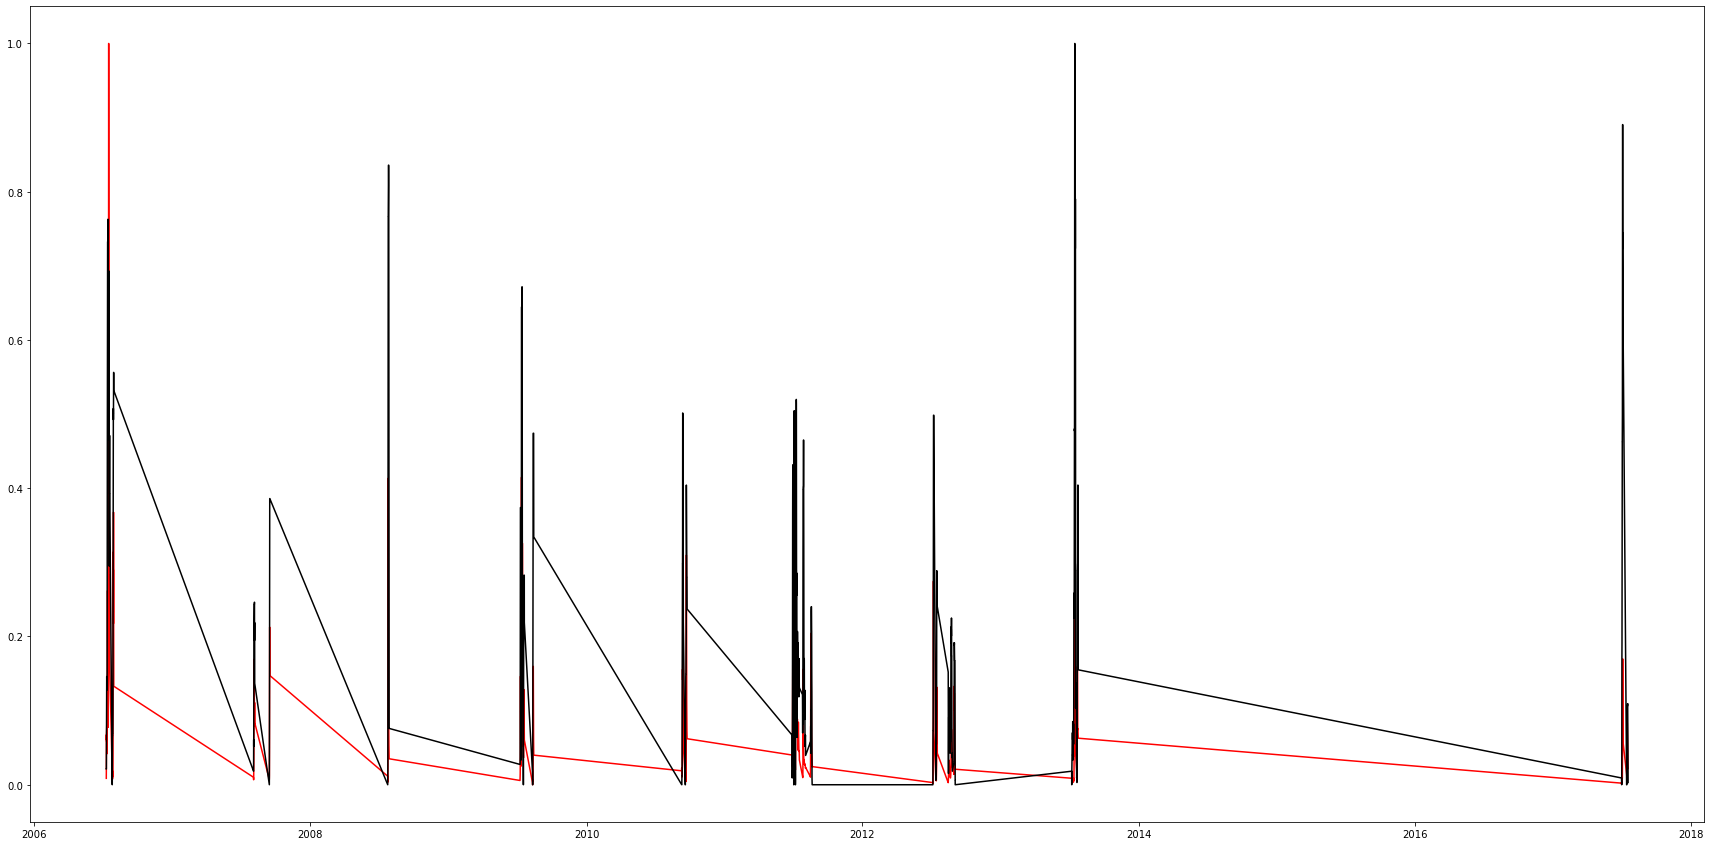

In [36]:
plt.figure(figsize = (30,15))
# plt.plot(df['avg_D_waterfall'], color = 'black') #강우량
plt.plot(df['유입량'], color = 'red') 
plt.plot(df['Unnamed: 7'], color = 'black')#

In [37]:
# feature_col = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']
# label_col = ['유입량']

In [38]:
feature_col = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','add_D+E_waterlevel']
label_col = ['유입량']

# make_dataset 을 통해서 window_size 를 설정할수 있음

In [39]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [40]:
# 325 는 홍수 번호 23, 24, 25 를 의미. 일단은 여기에 있는 값을 예측하도록 만들어 보자.
# 홍수 번호 22 까지 train set 으로 설정하고, 23,24,25 는 test set 으로 설정!
TEST_SIZE = 325
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

train_feature = train[feature_col]
train_label = train[label_col]

# train_feature 는 일단 홍수 번호 22 까지만 포함하였다. 

In [41]:
print(len(train_feature),len(train_label))

2566 2566


In [42]:
train_feature

데이터집단 1  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
date                                                                
2006-07-10 07:00:00  0.019488    0.021277    0.019074    0.027668   
2006-07-10 08:00:00  0.019184    0.021277    0.021798    0.027668   
2006-07-10 09:00:00  0.019488    0.021277    0.024523    0.027668   
2006-07-10 10:00:00  0.022229    0.021277    0.027248    0.027668   
2006-07-10 11:00:00  0.024970    0.021277    0.032698    0.031621   
...                       ...         ...         ...         ...   
2013-07-19 05:00:00  0.097267    0.136778    0.114441    0.035573   
2013-07-19 06:00:00  0.097140    0.136778    0.114441    0.035573   
2013-07-19 07:00:00  0.097140    0.136778    0.114441    0.035573   
2013-07-19 08:00:00  0.097140    0.136778    0.114441    0.035573   
2013-07-19 09:00:00  0.097140    0.136778    0.114441    0.035573   

                     Unnamed: 10  Unnamed: 11  Unnamed: 12   데이터집단 2  \
date                                                                   
2006-07-10 07:00:00     0.030534     0.093930     0.153560  0.019184   
2006-07-10 08:00:00     0.030534     0.093291     0.153312  0.019488   
2006-07-10 09:00:00     0.030534     0.093291     0.153064  0.022229   
2006-07-10 10:00:00     0.030534     0.093291     0.153064  0.024970   
2006-07-10 11:00:00     0.038168     0.093291     0.153064  0.034409   
...                          ...          ...          ...       ...   
2013-07-19 05:00:00     0.026718     0.174441     0.654924  0.097140   
2013-07-19 06:00:00     0.019084     0.173163     0.654924  0.097140   
2013-07-19 07:00:00     0.019084     0.172524     0.654924  0.097140   
2013-07-19 08:00:00     0.019084     0.171885     0.654924  0.097140   
2013-07-19 09:00:00     0.019084     0.171246     0.654924  0.097140   

                     Unnamed: 14  Unnamed: 15  ...  Unnamed: 39  Unnamed: 40  \
date                                           ...                             
2006-07-10 07:00:00     0.020772     0.019074  ...     0.093930     0.157418   
2006-07-10 08:00:00     0.020772     0.021798  ...     0.093291     0.156941   
2006-07-10 09:00:00     0.020772     0.024523  ...     0.093291     0.156464   
2006-07-10 10:00:00     0.020772     0.027248  ...     0.093291     0.155828   
2006-07-10 11:00:00     0.026706     0.032698  ...     0.093291     0.155192   
...                          ...          ...  ...          ...          ...   
2013-07-19 05:00:00     0.133531     0.114441  ...     0.174441     0.655430   
2013-07-19 06:00:00     0.133531     0.114441  ...     0.173163     0.655589   
2013-07-19 07:00:00     0.133531     0.114441  ...     0.172524     0.655748   
2013-07-19 08:00:00     0.133531     0.114441  ...     0.171885     0.655907   
2013-07-19 09:00:00     0.133531     0.114441  ...     0.171246     0.655907   

                     데이터 집단 6  Unnamed: 42  Unnamed: 43  Unnamed: 44  \
date                                                                   
2006-07-10 07:00:00  0.020046     0.020290     0.019499     0.032389   
2006-07-10 08:00:00  0.022873     0.020290     0.022284     0.040486   
2006-07-10 09:00:00  0.025700     0.020290     0.025070     0.040486   
2006-07-10 10:00:00  0.035436     0.026087     0.027855     0.060729   
2006-07-10 11:00:00  0.045173     0.034783     0.033426     0.072874   
...                       ...          ...          ...          ...   
2013-07-19 05:00:00  0.099625     0.130435     0.116992     0.036437   
2013-07-19 06:00:00  0.093772     0.130435     0.116992     0.028340   
2013-07-19 07:00:00  0.084925     0.130435     0.111421     0.008097   
2013-07-19 08:00:00  0.077907     0.130435     0.111421     0.008097   
2013-07-19 09:00:00  0.071269     0.130435     0.111421     0.004049   

                     Unnamed: 45  Unnamed: 46  Unnamed: 47  add_D+E_waterlevel  
date                                                                            
2006-07-10 07:00:00     0.030651     0.093930  

In [43]:
train_label

유입량
date                         
2006-07-10 07:00:00  0.008630
2006-07-10 08:00:00  0.009926
2006-07-10 09:00:00  0.011529
2006-07-10 10:00:00  0.013919
2006-07-10 11:00:00  0.017731
...                       ...
2013-07-19 05:00:00  0.032520
2013-07-19 06:00:00  0.031548
2013-07-19 07:00:00  0.030498
2013-07-19 08:00:00  0.029575
2013-07-19 09:00:00  0.029013

[2566 rows x 1 columns]

# 여기 윗까지 일단 train_label 이랑, train_feature 를 나누는 것에 성공을 하였다. 

# 여기에 있는 115 는 window_size 를 의미하는 값이다. 

In [44]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [45]:
print(len(train_feature), len(train_label))

2546 2546


In [46]:
train_label

array([[0.06010701],
       [0.05826407],
       [0.05869976],
       ...,
       [0.03049788],
       [0.0295746 ],
       [0.02901311]])

In [47]:
train_feature

array([[[0.01948843, 0.0212766 , 0.01907357, ..., 0.09392971,
         0.15531281, 0.15788695],
        [0.01918392, 0.0212766 , 0.02179837, ..., 0.09329073,
         0.15491559, 0.15740638],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.09329073,
         0.15451837, 0.15722154],
        ...,
        [0.17356882, 0.12462006, 0.16621253, ..., 0.18913738,
         0.15292949, 0.20102769],
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.19744409,
         0.15352532, 0.20542679],
        [0.18087698, 0.13069909, 0.17166213, ..., 0.20127796,
         0.15431976, 0.20794056]],

       [[0.01918392, 0.0212766 , 0.02179837, ..., 0.09329073,
         0.15491559, 0.15740638],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.09329073,
         0.15451837, 0.15722154],
        [0.02222899, 0.0212766 , 0.02724796, ..., 0.09329073,
         0.15431976, 0.15722154],
        ...,
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.19744409,
         0.15352532, 0.20542679],
        [0.1

# train dataset 과 validation dataset 의 분리 
test size 는 633 이라는 갯수는 23,24,25 홍수 번호를 사용하는 것이다

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=632) #632
print("x_train.shape", "x_valid.shape")
print(x_train.shape, x_valid.shape)
print("y_train, y_valid")
print(y_train.shape, y_valid.shape)

test_feature = test[feature_col]
test_label = test[label_col]



# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
print("test_feature.shape, test_label.shape")
print(test_feature.shape, test_label.shape)

x_train.shape x_valid.shape
(1914, 20, 43) (632, 20, 43)
y_train, y_valid
(1914, 1) (632, 1)
test_feature.shape, test_label.shape
(305, 20, 43) (305, 1)


# 아 train_featureshape[1] 이라는게 time step 을 의미하는 것인가? 


In [49]:
print(train_feature.shape[0])
print(train_feature.shape[1])

2546
20


In [50]:
# import tensorflow as tf
# from keras.optimizers import adam

In [51]:
# from keras import optimizers
# import keras
# adam = keras.optimizers.AdamOptimizers(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM, GRU
import os
from tensorflow.keras import optimizers
import tensorflow.keras
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adam = tf.keras.optimizers.Adam(lr =0.0001)

model = Sequential()
model.add(LSTM(20,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='tanh',return_sequences=False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer= 'adam')

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# filename = os.path.join('tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

print(model.summary())

2021-08-25 20:52:23.233562: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-08-25 20:52:23.276245: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f95a8162040 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-08-25 20:52:23.276280: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                5120      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 5,141
Trainable params: 5,141
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=20, batch_size=20)
final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

In [54]:
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=20,
                    verbose = 1,
                    validation_data=(x_valid, y_valid))

Epoch 1/100
96/96 [==============================] - 2s 17ms/step - loss: 0.0170 - val_loss: 0.0040
Epoch 2/100
96/96 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 3/100
96/96 [==============================] - 1s 11ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/100
96/96 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
96/96 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 9.5598e-04
Epoch 7/100
96/96 [==============================] - 1s 10ms/step - loss: 9.5012e-04 - val_loss: 9.7034e-04
Epoch 8/100
96/96 [==============================] - 1s 12ms/step - loss: 8.0856e-04 - val_loss: 7.5710e-04
Epoch 9/100
96/96 [==============================] - 1s 10ms/step - loss: 7.2111e-04 - val_loss: 8.1430e-04
Epoch 10/100
96/96 [==============================] - 1s 10ms/step - los

96/96 [==============================] - 1s 10ms/step - loss: 2.3781e-04 - val_loss: 4.0997e-04
Epoch 77/100
96/96 [==============================] - 1s 10ms/step - loss: 3.1858e-04 - val_loss: 2.8865e-04
Epoch 78/100
96/96 [==============================] - 1s 10ms/step - loss: 2.4190e-04 - val_loss: 2.8712e-04
Epoch 79/100
96/96 [==============================] - 1s 10ms/step - loss: 2.1862e-04 - val_loss: 2.7563e-04
Epoch 80/100
96/96 [==============================] - 1s 10ms/step - loss: 2.2518e-04 - val_loss: 2.9667e-04
Epoch 81/100
96/96 [==============================] - 1s 10ms/step - loss: 2.2976e-04 - val_loss: 2.7759e-04
Epoch 82/100
96/96 [==============================] - 1s 10ms/step - loss: 2.2103e-04 - val_loss: 2.8797e-04
Epoch 83/100
96/96 [==============================] - 1s 10ms/step - loss: 2.8121e-04 - val_loss: 5.0975e-04
Epoch 84/100
96/96 [==============================] - 1s 10ms/step - loss: 2.7489e-04 - val_loss: 3.6684e-04
Epoch 85/100
96/96 [============

In [55]:
# import os
# from os.path import join
# from tensorflow.keras.optimizers import RMSprop
# # opt = RMSprop(lr=0.001)

# model.compile(loss='mean_squared_error', optimizer = 'adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# filename = os.path.join('tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# history = model.fit(x_train, y_train, 
#                     epochs=200, 
#                     batch_size=16,
#                     verbose = 1,
#                     validation_data=(x_valid, y_valid),
#                     callbacks=[early_stop, checkpoint])  
# # history = model.fit(x_train, y_train, 
# #                     epochs=100, 
# #                     batch_size=16,
# #                     verbose = 1,
# #                     validation_data=(x_valid, y_valid)) 

In [56]:
# model.load_weights(filename)
pred = model.predict(test_feature)

# RMSE 뽑아 내기 

In [57]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_label,pred)**0.5
RMSE

0.03148790280883367

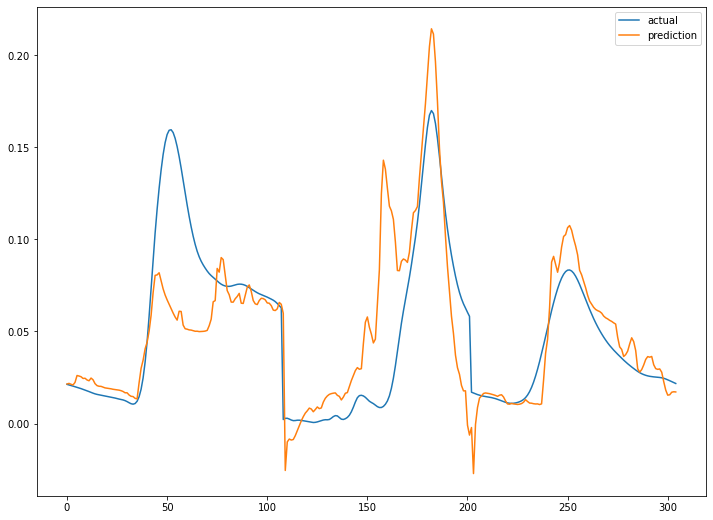

In [58]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()